In [1]:
import numpy as np
import scipy.interpolate as sci
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import maxwell
from matplotlib.ticker import FuncFormatter
import h5py
import matplotlib.pyplot as plt
from readers_auriga import readsubfind_auriga
from readers_auriga import readsnap_auriga
from numpy import linalg as la
from function_database import *
import time
import os
from matplotlib.colors import LogNorm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
from function_database_II import *
from scipy.interpolate import RegularGridInterpolator
from matplotlib.pyplot import figure
from astropy.io import fits
from astropy.coordinates import cartesian_to_spherical
from astropy.coordinates import spherical_to_cartesian





dm_mass = 49220.34305979

In [2]:
datapathh


NameError: name 'datapathh' is not defined

In [3]:
### Select the path to the simulation datafile containing halo information

halo_to_analyze = 'V6'


datapathh = '/cosma5/data/durham/dc-vien1/Github_folder/'+ halo_to_analyze + '/'
datapathh_flipped = '/cosma5/data/durham/dc-vien1/Github_folder/'+ halo_to_analyze + '_flipped/'




### Check which files need to be created for the given halo, if any 

if os.path.exists(datapathh + halo_to_analyze + '_gal_data_stuff.npz') == False:
    print('Need to create the main data file')
else:
    print('Main data file created for ' + str(len(np.load(datapathh + halo_to_analyze + '_gal_data_stuff.npz', allow_pickle=True)['arr_1'][0])) + ' particles')
    
if os.path.exists(datapathh_flipped + halo_to_analyze + '_gal_data_stuff.npz') == False:
    print('Need to create the main flipped data file')
else:
    print('Main flipped data file created for ' , str(len(np.load(datapathh_flipped + halo_to_analyze + '_gal_data_stuff.npz', allow_pickle=True)['arr_1'][0])) + ' particles')
    
    
print('')
    
    
if os.path.exists(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy') == False:
    print('Need to create the voronoi density file')
else:
    print('Voronoi density file created for ' , str(len(np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle=True))) + ' smoothhalo particles')
    
print('')
    
    
if os.path.exists(datapathh + halo_to_analyze + '_mainhalo_mu.npz') == False:
    print('Need to create the smoothhalo mu data file')
else:
    print('Smoothhalo mu data file created for ' , str(len(np.load(datapathh + halo_to_analyze + '_mainhalo_mu.npz', allow_pickle=True)['arr_1'])) + ' smoothhalo particles')
    
if os.path.exists(datapathh_flipped + halo_to_analyze + '_mainhalo_mu.npz') == False:
    print('Need to create the smoothhalo mu flipped data file')
else:
    print('Smoothhalo mu flipped data file created ' , str(len(np.load(datapathh_flipped + halo_to_analyze + '_mainhalo_mu.npz', allow_pickle=True)['arr_1'])) + ' smoothhalo particles')

    
print('')
    
if os.path.exists(datapathh + halo_to_analyze + '_subhalo_mu.npz') == False:
    print('Need to create the subhalo mu data file')
else:
    print('Subhalo mu data file created ' , str(len(np.load(datapathh + halo_to_analyze + '_subhalo_mu.npz', allow_pickle=True)['arr_1'])) + ' subhalos')
    
if os.path.exists(datapathh_flipped + halo_to_analyze + '_subhalo_mu.npz') == False:
    print('Need to create the subhalo mu flipped data file')
else:
    print('Subhalo mu flipped data file created ' , str(len(np.load(datapathh_flipped + halo_to_analyze + '_subhalo_mu.npz', allow_pickle=True)['arr_1'])) + ' subhalos')
    
    

    
    

Main data file created for 72129277 particles
Main flipped data file created for  72129277 particles

Voronoi density file created for  52628893 smoothhalo particles

Smoothhalo mu data file created for  34355468 smoothhalo particles
Smoothhalo mu flipped data file created  46573224 smoothhalo particles

Subhalo mu data file created  5498 subhalos
Subhalo mu flipped data file created  2750 subhalos


In [252]:
### Loading in APOSTLE data and creating the Galactic frame datafile
### Comment out if file is already created


'''
gal_data, DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag, subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31, groupnum_mw_m31, rmax_mw_m31, vmax_mw_m31 = loadApostle(halo_to_analyze+'_HR_fix', 'mw')

gal_data_flipped, DM_coords_galframe_flipped, DM_vels_galframe_flipped, subhalo_coords_galframe_flipped, subhalo_vels_galframe_flipped, ctr_mw_galframe_flipped, ctr_m31_galframe_flipped, subhalo_size_flag_flipped, subflags_mw_m31_flipped, groupflags_mw_m31_flipped, subgroupnum_mw_m31_flipped, groupnum_mw_m31_flipped, rmax_mw_m31_flipped, vmax_mw_m31_flipped = loadApostle(halo_to_analyze+'_HR_fix', 'm31')


np.savez(datapathh + halo_to_analyze + '_gal_data_stuff', DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag, subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31, groupnum_mw_m31, rmax_mw_m31, vmax_mw_m31, gal_data.r200_mw, gal_data.r200_m31, gal_data.fof_mw, gal_data.fof_m31, gal_data.sub_mw, gal_data.sub_m31)

np.savez(datapathh_flipped + halo_to_analyze +  '_gal_data_stuff', DM_coords_galframe_flipped, DM_vels_galframe_flipped, subhalo_coords_galframe_flipped, subhalo_vels_galframe_flipped, ctr_mw_galframe_flipped, ctr_m31_galframe_flipped, subhalo_size_flag_flipped, subflags_mw_m31_flipped, groupflags_mw_m31_flipped, subgroupnum_mw_m31_flipped, groupnum_mw_m31_flipped, rmax_mw_m31_flipped, vmax_mw_m31_flipped, gal_data_flipped.r200_mw, gal_data_flipped.r200_m31, gal_data_flipped.fof_mw, gal_data_flipped.fof_m31, gal_data_flipped.sub_mw, gal_data_flipped.sub_m31)
'''



209609
209609
MW R200 =  260.71045
fof_mw: 1
fof_m31: 1
sub_mw: 0
sub_m31: 1
vel_mw [ 107.845184 -122.64269   -97.6097  ]
MW center: [35963.684 59983.73  43790.016]
M31 center: [36159.875 59227.516 43259.043]
Number of subs: 9974
(array([    5,    10,    12, ..., 40214, 41162, 48157]),)
(array([    2,     3,     7, ..., 51461, 55162, 69905]),)
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 11597219
209609
209609
1073741824
209609
Extracting the MW-M31 system from the full volume
Computing the Galactic frame transformation matrix and transforming the DM particles and subhalos
Transforming to galactic reference frame...
DM positions transf

In [253]:
### Reading in the data from the saved Galactic frame datafile

### Placing the DM particles and subhalos positions and velocities in the Galactic reference frame



output = np.load(datapathh + halo_to_analyze + '_gal_data_stuff.npz', allow_pickle = True)

DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag, subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31, groupnum_mw_m31, rmax_mw_m31, vmax_mw_m31, r200_mw, r200_m31, fof_mw, fof_m31, sub_mw, sub_m31 = output['arr_0'], output['arr_1'], output['arr_2'], output['arr_3'], output['arr_4'], output['arr_5'], output['arr_6'], output['arr_7'], output['arr_8'], output['arr_9'], output['arr_10'], output['arr_11'], output['arr_12'], output['arr_13'], output['arr_14'], output['arr_15'], output['arr_16'], output['arr_17'], output['arr_18']



ctr_mw_galframe = np.array([ctr_mw_galframe[0][0], ctr_mw_galframe[1][0], ctr_mw_galframe[2][0]])
ctr_m31_galframe = np.array([ctr_m31_galframe[0][0], ctr_m31_galframe[1][0], ctr_m31_galframe[2][0]])

subhalo_coords_galframe = np.array(list(zip(*[subhalo_coords_galframe[0], subhalo_coords_galframe[1], subhalo_coords_galframe[2]])))
DM_coords_galframe = np.array(list(zip(*[DM_coords_galframe[0], DM_coords_galframe[1], DM_coords_galframe[2]])))

subhalo_coords_galframe_pyr_dist_to_mw = np.sum(np.abs(subhalo_coords_galframe - ctr_mw_galframe)**2,axis=-1)**(1./2)
subhalo_coords_galframe_pyr_dist_to_m31 = np.sum(np.abs(subhalo_coords_galframe - ctr_m31_galframe)**2,axis=-1)**(1./2)

DM_vels_galframe = np.array(list(zip(*[DM_vels_galframe[0], DM_vels_galframe[1], DM_vels_galframe[2]])))
subhalo_vels_galframe = np.array(list(zip(*[subhalo_vels_galframe[0], subhalo_vels_galframe[1], subhalo_vels_galframe[2]])))







output = np.load(datapathh_flipped + halo_to_analyze + '_gal_data_stuff.npz', allow_pickle = True)

DM_coords_galframe_flipped, DM_vels_galframe_flipped, subhalo_coords_galframe_flipped, subhalo_vels_galframe_flipped, ctr_mw_galframe_flipped, ctr_m31_galframe_flipped, subhalo_size_flag_flipped, subflags_mw_m31_flipped, groupflags_mw_m31_flipped, subgroupnum_mw_m31_flipped, groupnum_mw_m31_flipped, rmax_mw_m31_flipped, vmax_mw_m31_flipped, r200_mw_flipped, r200_m31_flipped, fof_mw_flipped, fof_m31_flipped, sub_mw_flipped, sub_m31_flipped = output['arr_0'], output['arr_1'], output['arr_2'], output['arr_3'], output['arr_4'], output['arr_5'], output['arr_6'], output['arr_7'], output['arr_8'], output['arr_9'], output['arr_10'], output['arr_11'], output['arr_12'], output['arr_13'], output['arr_14'], output['arr_15'], output['arr_16'], output['arr_17'], output['arr_18']


ctr_mw_galframe_flipped = np.array([ctr_mw_galframe_flipped[0][0], ctr_mw_galframe_flipped[1][0], ctr_mw_galframe_flipped[2][0]])
ctr_m31_galframe_flipped = np.array([ctr_m31_galframe_flipped[0][0], ctr_m31_galframe_flipped[1][0], ctr_m31_galframe_flipped[2][0]])

subhalo_coords_galframe_flipped = np.array(list(zip(*[subhalo_coords_galframe_flipped[0], subhalo_coords_galframe_flipped[1], subhalo_coords_galframe_flipped[2]])))
DM_coords_galframe_flipped = np.array(list(zip(*[DM_coords_galframe_flipped[0], DM_coords_galframe_flipped[1], DM_coords_galframe_flipped[2]])))

subhalo_coords_galframe_pyr_dist_to_mw_flipped = np.sum(np.abs(subhalo_coords_galframe_flipped - ctr_mw_galframe_flipped)**2,axis=-1)**(1./2)
subhalo_coords_galframe_pyr_dist_to_m31_flipped = np.sum(np.abs(subhalo_coords_galframe_flipped - ctr_m31_galframe_flipped)**2,axis=-1)**(1./2)

DM_vels_galframe_flipped = np.array(list(zip(*[DM_vels_galframe_flipped[0], DM_vels_galframe_flipped[1], DM_vels_galframe_flipped[2]])))
subhalo_vels_galframe_flipped = np.array(list(zip(*[subhalo_vels_galframe_flipped[0], subhalo_vels_galframe_flipped[1], subhalo_vels_galframe_flipped[2]])))






In [255]:
### Extracting out the smooth halo particles



mainnn = np.logical_and((np.logical_or((subflags_mw_m31 == sub_mw), (subflags_mw_m31 == sub_m31))), (np.logical_or((groupflags_mw_m31 == fof_mw), (groupflags_mw_m31 == fof_m31))))

DM_coords_mainhalo = DM_coords_galframe[mainnn]
DM_vels_mainhalo = DM_vels_galframe[mainnn]

DMcoords_mainhalo_pyr_dist_to_mw = np.sum(np.abs(DM_coords_mainhalo - ctr_mw_galframe)**2,axis=-1)**(1./2)
DMcoords_mainhalo_pyr_dist_to_m31 = np.sum(np.abs(DM_coords_mainhalo - ctr_m31_galframe)**2,axis=-1)**(1./2)    

subhalo_coords_galframe_pyr_dist_to_mw = np.sum(np.abs(subhalo_coords_galframe - ctr_mw_galframe)**2,axis=-1)**(1./2)
subhalo_coords_galframe_pyr_dist_to_m31 = np.sum(np.abs(subhalo_coords_galframe - ctr_m31_galframe)**2,axis=-1)**(1./2)    





mainnn_flipped = np.logical_and((np.logical_or((subflags_mw_m31_flipped == sub_mw_flipped), (subflags_mw_m31_flipped == sub_m31_flipped))), (np.logical_or((groupflags_mw_m31_flipped == fof_mw_flipped), (groupflags_mw_m31_flipped == fof_m31_flipped))))

DM_coords_mainhalo_flipped = DM_coords_galframe_flipped[mainnn_flipped]
DM_vels_mainhalo_flipped = DM_vels_galframe_flipped[mainnn_flipped]

DMcoords_mainhalo_pyr_dist_to_mw_flipped = np.sum(np.abs(DM_coords_mainhalo_flipped - ctr_mw_galframe_flipped)**2,axis=-1)**(1./2)
DMcoords_mainhalo_pyr_dist_to_m31_flipped = np.sum(np.abs(DM_coords_mainhalo_flipped - ctr_m31_galframe_flipped)**2,axis=-1)**(1./2)    

subhalo_coords_galframe_pyr_dist_to_mw_flipped = np.sum(np.abs(subhalo_coords_galframe_flipped - ctr_mw_galframe)**2,axis=-1)**(1./2)
subhalo_coords_galframe_pyr_dist_to_m31_flipped = np.sum(np.abs(subhalo_coords_galframe_flipped - ctr_m31_galframe)**2,axis=-1)**(1./2)    





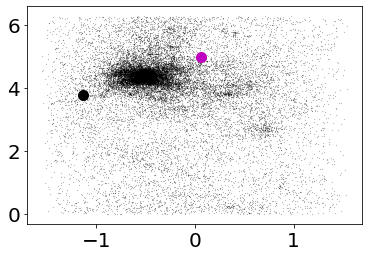

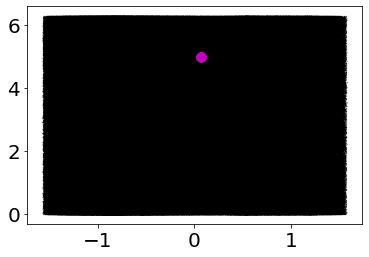

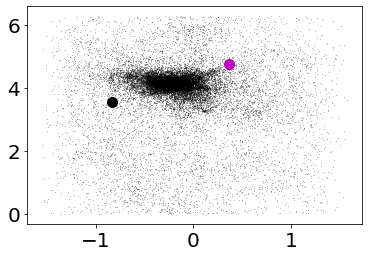

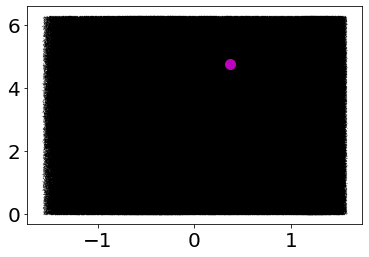

In [261]:


vv = [ctr_mw_galframe[0]- ctr_m31_galframe[0], ctr_mw_galframe[1]- ctr_m31_galframe[1], ctr_mw_galframe[2]- ctr_m31_galframe[2]]

vv = vv/np.linalg.norm(vv)
pyr_point = [100*vv[0], 100*vv[1], 100*vv[2]]


vv_flipped = [ctr_m31_galframe_flipped[0]- ctr_mw_galframe_flipped[0], ctr_m31_galframe_flipped[1]- ctr_mw_galframe_flipped[1], ctr_m31_galframe_flipped[2]- ctr_mw_galframe_flipped[2]]

vv_flipped = vv_flipped/np.linalg.norm(vv_flipped)
pyr_point_flipped = [100*vv_flipped[0], 100*vv_flipped[1], 100*vv_flipped[2]]



#V1: 1, subhalo_mainhalo_cut = [True]*len(subhalo_coords_galframe[:,0])
#V4: 0.6, subhalo_mainhalo_cut = np.logical_or((subhalo_coords_galframe_pyr_dist_to_mw < r200_mw), (subhalo_coords_galframe_pyr_dist_to_m31 < r200_m31))





#
#opening_angle = 1
#opening_angle = 0.4
#opening_angle = 0.8
opening_angle = 0.6
#opening_angle = 2*np.pi



subhalo_big_cut = pyramidFlagger(subhalo_coords_galframe[:,0], subhalo_coords_galframe[:,1], subhalo_coords_galframe[:,2], pyr_point, ctr_m31_galframe, opening_angle, opening_angle)

DM_big_cut = pyramidFlagger(DM_coords_mainhalo[:,0], DM_coords_mainhalo[:,1], DM_coords_mainhalo[:,2], pyr_point, ctr_m31_galframe, opening_angle, opening_angle)

subhalo_mainhalo_cut = np.logical_or((subhalo_coords_galframe_pyr_dist_to_mw < r200_mw), (subhalo_coords_galframe_pyr_dist_to_m31 < r200_m31))
#subhalo_mainhalo_cut = [True]*len(subhalo_coords_galframe[:,0])


subhalo_big_cut_flipped = pyramidFlagger(subhalo_coords_galframe_flipped[:,0], subhalo_coords_galframe_flipped[:,1], subhalo_coords_galframe_flipped[:,2], pyr_point_flipped, ctr_mw_galframe_flipped, opening_angle, opening_angle)
DM_big_cut_flipped = pyramidFlagger(DM_coords_mainhalo_flipped[:,0], DM_coords_mainhalo_flipped[:,1], DM_coords_mainhalo_flipped[:,2], pyr_point_flipped, ctr_mw_galframe_flipped, opening_angle, opening_angle)
subhalo_mainhalo_cut_flipped = np.logical_or((subhalo_coords_galframe_pyr_dist_to_mw_flipped < r200_mw_flipped), (subhalo_coords_galframe_pyr_dist_to_m31_flipped < r200_m31_flipped))
#subhalo_mainhalo_cut_flipped = [True]*len(subhalo_coords_galframe_flipped[:,0])


In [248]:
len(DM_coords_mainhalo_flipped[DM_big_cut_flipped][:,0])

41505588

In [ ]:
plt.plot(DM_coords_mainhalo[DM_big_cut][:,0], DM_coords_mainhalo[DM_big_cut][:,2], 'ko', ms=0.01)

plt.plot(ctr_mw_galframe[0], ctr_mw_galframe[1], marker='o', ms=10, c='c')

plt.plot(ctr_m31_galframe[0], ctr_m31_galframe[1], marker='o', ms=10, c='r')
plt.show()

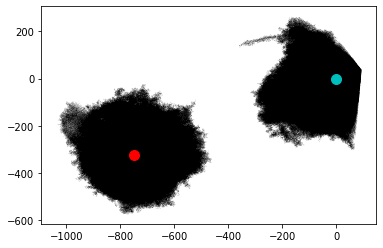

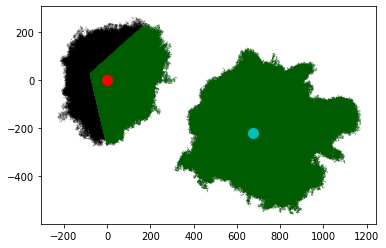

In [186]:
plt.plot(DM_coords_mainhalo[DM_big_cut][:,0], DM_coords_mainhalo[DM_big_cut][:,2], 'ko', ms=0.01)

plt.plot(ctr_mw_galframe[0], ctr_mw_galframe[2], marker='o', ms=10, c='c')

plt.plot(ctr_m31_galframe[0], ctr_m31_galframe[2], marker='o', ms=10, c='r')

plt.show()


plt.plot(DM_coords_mainhalo_flipped[:,0], DM_coords_mainhalo_flipped[:,1], 'ko', ms=0.01)


plt.plot(DM_coords_mainhalo_flipped[DM_big_cut_flipped][:,0], DM_coords_mainhalo_flipped[DM_big_cut_flipped][:,1], 'go', ms=0.01)

plt.plot(ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], marker='o', ms=10, c='c')

plt.plot(ctr_m31_galframe_flipped[0], ctr_m31_galframe_flipped[1], marker='o', ms=10, c='r')

plt.show()

In [258]:

### Computing the density at each smooth halo particle position with a Voronoi tesselation
### Comment out if voronoi file is already created


mainhalo_density_func(datapathh, halo_to_analyze, DM_coords_mainhalo, dm_mass)




Computing Voronoi tessellation...
Errors: 0
19381.945197582245


In [11]:
### Loading in the voronoi data files


mainhalo_voronoi = np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)

mainhalo_voronoi_flipped = np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)



In [ ]:
### Computing the mu for each subhalo and saving to a file
### Comment out if file is already created


subhalo_mu_func(datapathh, halo_to_analyze, dm_mass, DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], subhalo_vels_galframe[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], groupnum_mw_m31[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], sub_mw, sub_m31, fof_mw, fof_m31)

subhalo_mu_func(datapathh_flipped, halo_to_analyze, dm_mass, DM_coords_galframe_flipped, DM_vels_galframe_flipped, subhalo_coords_galframe_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], subhalo_vels_galframe_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], subflags_mw_m31_flipped, groupflags_mw_m31_flipped, subgroupnum_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], groupnum_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], sub_mw_flipped, sub_m31_flipped, fof_mw_flipped, fof_m31_flipped)





In [239]:
mainhalo_mu_files = np.load(datapathh_flipped + halo_to_analyze + '_mainhalo_mu.npz', allow_pickle = True)

mainhalo_mu_s = mainhalo_mu_files['arr_1']



In [ ]:

### Computing the mu value across the smooth halo to be interpolated, saving it as a file
### Comment out if file is already created


mainhalo_mu_func(datapathh, halo_to_analyze, DM_coords_mainhalo[DM_big_cut], DM_vels_mainhalo[DM_big_cut], dm_mass, ctr_mw_galframe, ctr_m31_galframe, r200_mw, r200_m31)


mainhalo_mu_func(datapathh_flipped, halo_to_analyze, DM_coords_mainhalo_flipped[DM_big_cut_flipped], DM_vels_mainhalo_flipped[DM_big_cut_flipped], dm_mass, ctr_mw_galframe_flipped, ctr_m31_galframe_flipped, r200_mw_flipped, r200_m31_flipped)





In [238]:
len(mainhalo_voronoi_flipped[DM_big_cut_flipped])

38438883

In [241]:
len(DM_coords_mainhalo_flipped[DM_big_cut_flipped])

38438883

In [234]:
len(DM_coords_mainhalo[DM_big_cut])

36659080

In [ ]:

### Computing the JFactor integrands for all smooth halo particles and subhalos and saving it to a file
### Comment out if file is already created


mainhalo_voronoi_flipped = np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)

local_densities_flipped = float(dm_mass)/np.array(mainhalo_voronoi_flipped)
local_densities_flipped = local_densities_flipped[DM_big_cut_flipped]

computeJFactorIntegrands(datapathh_flipped, halo_to_analyze, DM_coords_galframe_flipped, DM_vels_galframe_flipped, DM_coords_mainhalo_flipped[DM_big_cut_flipped], DM_vels_mainhalo_flipped[DM_big_cut_flipped], subhalo_coords_galframe_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], subflags_mw_m31_flipped, groupflags_mw_m31_flipped, subgroupnum_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], groupnum_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], subhalo_size_flag_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], rmax_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], vmax_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], r200_mw, dm_mass, sub_mw, sub_m31, local_densities_flipped, True)




mainhalo_voronoi = np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)

local_densities = float(dm_mass)/np.array(mainhalo_voronoi)
local_densities = local_densities[DM_big_cut]


computeJFactorIntegrands(datapathh, halo_to_analyze, DM_coords_galframe, DM_vels_galframe, DM_coords_mainhalo[DM_big_cut], DM_vels_mainhalo[DM_big_cut], subhalo_coords_galframe[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], groupnum_mw_m31[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], subhalo_size_flag[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], rmax_mw_m31[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], vmax_mw_m31[np.logical_and((subhalo_big_cut), (subhalo_mainhalo_cut))], r200_mw, dm_mass, sub_mw, sub_m31, local_densities, False)





In [197]:

mainhalo_mu_files = np.load(datapathh_flipped + halo_to_analyze + '_mainhalo_mu.npz', allow_pickle = True)

mainhalo_mu_s = mainhalo_mu_files['arr_1']

In [198]:
len(mainhalo_mu_s)



41505588

In [199]:

mainhalo_I_files = np.load(datapathh_flipped + halo_to_analyze + '_mainhalo_jfactor_integrand.npz', allow_pickle = True)                         

mainhalo_I_s_flipped = mainhalo_I_files['arr_1']

In [200]:
len(mainhalo_I_s_flipped)

41505588

In [268]:


### Finding the correct position of the Sun within the given halo such that the other halo is at the correct
### longitude and latitude, for the case of MW-M31, the desired (lat, lon) are (-22, 121)


### Find the correct solar position

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

ll_list, bb_list = [], []

xi, yi, zi = sample_spherical(100)


phi = np.linspace(0, np.pi, 400)
theta = np.linspace(0, 2 * np.pi, 400)
r = 8


for phi_val in phi:
    for theta_val in theta:
        
        x_sun = r * np.cos(theta_val) * np.sin(phi_val)
        y_sun = r * np.sin(theta_val) * np.sin(phi_val)
        z_sun = r * np.cos(phi_val)

        solar_position_xyz = [x_sun, y_sun, z_sun]

        
        
        spherical_origin = np.array(solar_position_xyz)
        
        
        
        mw_center = np.array([0, 0, 0]) - spherical_origin
        m31_center = np.array(ctr_m31_galframe) - spherical_origin
        
        #pyramid_midline = np.array([ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], ctr_mw_galframe_flipped[2]]) - np.array(solar_position_xyz)

        r_mw, lat_mw, lon_mw = cartesian_to_spherical(mw_center[0], mw_center[1], mw_center[2])
        r_mw = r_mw.value
        lat_mw = lat_mw.value 
        lon_mw = lon_mw.value
        
        r_m31, lat_m31, lon_m31 = cartesian_to_spherical(m31_center[0], m31_center[1], m31_center[2])
        r_m31 = r_m31.value
        lat_m31 = lat_m31.value 
        lon_m31 = lon_m31.value
        
        l = lon_m31 - lon_mw
        b = lat_m31 - lat_mw
        
        l_target = 121
        b_target = -22
        
        ll_list.append(l)
        
        bb_list.append(b)
        
        if np.logical_and((np.round(abs(np.degrees(b) - b_target),1) < 1), (np.round(abs(abs(np.degrees(l)) - l_target),1) < 1)):
        
            #print(r_m31)
            #print(np.round(np.degrees(l), 1))
            #print(np.round(np.degrees(b),1))
            #print([x_sun, y_sun, z_sun])
            #print('')
            solar_position= [x_sun, y_sun, z_sun]
            
            
            
            
            
        
        mw_center_flipped = np.array([0, 0, 0]) - spherical_origin
        m31_center_flipped = np.array(ctr_mw_galframe_flipped) - spherical_origin
        
        #pyramid_midline = np.array([ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], ctr_mw_galframe_flipped[2]]) - np.array(solar_position_xyz)

        r_mw_flipped, lat_mw_flipped, lon_mw_flipped = cartesian_to_spherical(m31_center_flipped[0], m31_center_flipped[1], m31_center_flipped[2])
        r_mw_flipped = r_mw_flipped.value
        lat_mw_flipped = lat_mw_flipped.value 
        lon_mw_flipped = lon_mw_flipped.value
        
        r_m31_flipped, lat_m31_flipped, lon_m31_flipped = cartesian_to_spherical(mw_center_flipped[0], mw_center_flipped[1], mw_center_flipped[2])
        r_m31_flipped = r_m31_flipped.value
        lat_m31_flipped = lat_m31_flipped.value 
        lon_m31_flipped = lon_m31_flipped.value
        
        l_flipped = lon_m31_flipped - lon_mw_flipped
        b_flipped = lat_m31_flipped - lat_mw_flipped
        
        l_target = 121
        b_target = -22
        
        
        if np.logical_and((np.round(abs(np.degrees(b_flipped) - b_target),1) < 1), (np.round(abs(abs(np.degrees(l_flipped)) - l_target),1) < 1)):
        
            #print(r_m31)
            print(np.round(np.degrees(l_flipped), 1))
            print(np.round(np.degrees(b_flipped),1))
            print([x_sun, y_sun, z_sun])
            print('')
            solar_position_flipped= [x_sun, y_sun, z_sun]
            
        

distt = np.linalg.norm(solar_position - ctr_m31_galframe)

distt_flipped = np.linalg.norm(solar_position_flipped - ctr_mw_galframe_flipped)

120.7
-22.8
[-6.408418270915889, 0.05045878649063031, 4.788489237312464]

-121.3
-22.8
[2.8937043199039967, -5.7181156103310515, 4.788489237312464]

-120.4
-22.8
[2.9833868802911936, -5.671840402078419, 4.788489237312464]

120.7
-22.4
[-6.445921033936178, 0.05075407681533301, 4.73788202131984]

-121.3
-22.4
[2.9106385933506385, -5.751578646854448, 4.73788202131984]

-120.4
-22.4
[3.0008459858675542, -5.705032631033482, 4.73788202131984]

120.7
-21.9
[-6.483024186640336, 0.05104622067693535, 4.686981083681798]

-121.3
-21.9
[2.9273924238160047, -5.784685118326982, 4.686981083681798]

-120.4
-21.9
[3.0181190561191324, -5.737871180525016, 4.686981083681798]

120.7
-21.5
[-6.519725428844651, 0.05133519996418524, 4.63578957996597]

-121.3
-21.5
[2.9439647726582234, -5.817432972336367, 4.63578957996597]

-120.4
-21.5
[3.0352050202141525, -5.770354014750371, 4.63578957996597]

120.7
-21.1
[-6.556022485281565, 0.05162099676201611, 4.584310683753428]

-121.3
-21.1
[2.960354612486248, -5.8498201

In [ ]:
solar_position


In [163]:
solar_position = [0,8, 0]

In [124]:
solar_position

[-0.20776537214806384, 1.5728135543700665, -7.841115422777934]

In [126]:
distt_flipped

982.7586832927973

In [ ]:
plt.plot(DM_coords_mainhalo[DM_big_cut][:,0], DM_coords_mainhalo[DM_big_cut][:,2], 'ko', ms=0.01)

plt.plot(ctr_mw_galframe[0], ctr_mw_galframe[2], marker='o', ms=10, c='c')

plt.plot(ctr_m31_galframe[0], ctr_m31_galframe[2], marker='o', ms=10, c='r')

plt.show()



plt.plot(DM_coords_mainhalo_flipped[DM_big_cut_flipped][:,0], DM_coords_mainhalo_flipped[DM_big_cut_flipped][:,1], 'ko', ms=0.01)

plt.plot(ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], marker='o', ms=10, c='c')

plt.plot(ctr_m31_galframe_flipped[0], ctr_m31_galframe_flipped[1], marker='o', ms=10, c='r')

plt.show()

In [211]:
### Loading in the smooth halo and subhalo integrand files




mainhalo_I_files = np.load(datapathh + halo_to_analyze + '_mainhalo_jfactor_integrand.npz', allow_pickle = True)                         
mainhalo_I_som = mainhalo_I_files['arr_0']
mainhalo_I_s = mainhalo_I_files['arr_1']
mainhalo_I_p = mainhalo_I_files['arr_2']
mainhalo_I_d = mainhalo_I_files['arr_3']

subhalo_I_files = np.load(datapathh + halo_to_analyze + '_subhalo_jfactor_integrand.npz', allow_pickle = True)                         
subhalo_I_som = subhalo_I_files['arr_0']
subhalo_I_s = subhalo_I_files['arr_1']
subhalo_I_p = subhalo_I_files['arr_2']
subhalo_I_d = subhalo_I_files['arr_3']




mainhalo_I_files = np.load(datapathh_flipped + halo_to_analyze + '_mainhalo_jfactor_integrand.npz', allow_pickle = True)                         
mainhalo_I_som_flipped = mainhalo_I_files['arr_0']
mainhalo_I_s_flipped = mainhalo_I_files['arr_1']
mainhalo_I_p_flipped = mainhalo_I_files['arr_2']
mainhalo_I_d_flipped = mainhalo_I_files['arr_3']

subhalo_I_files = np.load(datapathh_flipped + halo_to_analyze + '_subhalo_jfactor_integrand.npz', allow_pickle = True)                         
subhalo_I_som_flipped = subhalo_I_files['arr_0']
subhalo_I_s_flipped = subhalo_I_files['arr_1']
subhalo_I_p_flipped = subhalo_I_files['arr_2']
subhalo_I_d_flipped = subhalo_I_files['arr_3']




In [212]:
### Transforming all positions to spherical coordinate system

mainhalo_coords_galframe_pyr_ = DM_coords_mainhalo[DM_big_cut] - np.array(solar_position)
subhalo_coords_galframe_pyr_ = subhalo_coords_galframe[subhalo_big_cut] - np.array(solar_position)
pyramid_midline = np.array([ctr_m31_galframe[0], ctr_m31_galframe[1], ctr_m31_galframe[2]]) - np.array(solar_position)
    
    
r_m31, lat_m31, lon_m31 = cartesian_to_spherical(pyramid_midline[0], pyramid_midline[1], pyramid_midline[2])
r_m31 = r_m31.value
lat_m31 = lat_m31.value 
lon_m31 = lon_m31.value


mainhalo_r, mainhalo_lat, mainhalo_lon = cartesian_to_spherical(mainhalo_coords_galframe_pyr_[:,0], mainhalo_coords_galframe_pyr_[:,1], mainhalo_coords_galframe_pyr_[:,2])
r = mainhalo_r.value
lat = mainhalo_lat.value
lon = mainhalo_lon.value
### Putting M31 in the middle of line of sight
mainhalo_r = r
#mainhalo_lat = lat 
#mainhalo_lon = lon 
mainhalo_lat = lat - lat_m31
mainhalo_lat = mainhalo_lat
mainhalo_lon = lon - lon_m31
mainhalo_lon = mainhalo_lon


subhalo_r, subhalo_lat, subhalo_lon = cartesian_to_spherical(subhalo_coords_galframe_pyr_[:,0], subhalo_coords_galframe_pyr_[:,1], subhalo_coords_galframe_pyr_[:,2])
r = subhalo_r.value
lat = subhalo_lat.value
lon = subhalo_lon.value


### Putting M31 in the middle of line of sight
subhalo_r = r
subalo_lat = lat - lat_m31
subhalo_lat = subhalo_lat
subhalo_lon = lon - lon_m31
subhalo_lon = subhalo_lon







mainhalo_coords_galframe_pyr_flipped_ = DM_coords_mainhalo_flipped[DM_big_cut_flipped] - np.array(solar_position_flipped)
subhalo_coords_galframe_pyr_flipped_ = subhalo_coords_galframe[subhalo_big_cut_flipped] - np.array(solar_position_flipped)  
pyramid_midline_flipped = np.array([ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], ctr_mw_galframe_flipped[2]]) - np.array(solar_position_flipped)
    
    
r_m31_flipped, lat_m31_flipped, lon_m31_flipped = cartesian_to_spherical(pyramid_midline_flipped[0], pyramid_midline_flipped[1], pyramid_midline_flipped[2])
r_m31_flipped = r_m31_flipped.value
lat_m31_flipped = lat_m31_flipped.value 
lon_m31_flipped = lon_m31_flipped.value


mainhalo_r_flipped, mainhalo_lat_flipped, mainhalo_lon_flipped = cartesian_to_spherical(mainhalo_coords_galframe_pyr_flipped_[:,0], mainhalo_coords_galframe_pyr_flipped_[:,1], mainhalo_coords_galframe_pyr_flipped_[:,2])
r_flipped = mainhalo_r_flipped.value
lat_flipped = mainhalo_lat_flipped.value
lon_flipped = mainhalo_lon_flipped.value
### Putting M31 in the middle of line of sight
mainhalo_r_flipped = r_flipped
#mainhalo_lat = lat 
#mainhalo_lon = lon 
mainhalo_lat_flipped = lat_flipped - lat_m31_flipped
mainhalo_lat_flipped = mainhalo_lat_flipped
mainhalo_lon_flipped = lon_flipped - lon_m31_flipped
mainhalo_lon_flipped = mainhalo_lon_flipped


subhalo_r_flipped, subhalo_lat_flipped, subhalo_lon_flipped = cartesian_to_spherical(subhalo_coords_galframe_pyr_flipped_[:,0], subhalo_coords_galframe_pyr_flipped_[:,1], subhalo_coords_galframe_pyr_flipped_[:,2])
r = subhalo_r_flipped.value
lat = subhalo_lat_flipped.value
lon = subhalo_lon_flipped.value


### Putting M31 in the middle of line of sight
subhalo_r_flipped = r
subalo_lat_flipped = lat - lat_m31_flipped
subhalo_lat_flipped = subhalo_lat_flipped
subhalo_lon_flipped = lon - lon_m31_flipped
subhalo_lon_flipped = subhalo_lon_flipped




In [213]:

### Extracting particles from the MW and M31 halos


m31_smooth_cut = DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut] <= 200
mw_smooth_cut = DMcoords_mainhalo_pyr_dist_to_mw[DM_big_cut] <= 200

m31_sub_cut = subhalo_coords_galframe_pyr_dist_to_m31[subhalo_big_cut] <= 200
mw_sub_cut = subhalo_coords_galframe_pyr_dist_to_mw[subhalo_big_cut] <= 200


 

#[DM_big_cut]
m31_smooth_cut_flipped = DMcoords_mainhalo_pyr_dist_to_m31_flipped[DM_big_cut_flipped] <= 200
mw_smooth_cut_flipped = DMcoords_mainhalo_pyr_dist_to_mw_flipped[DM_big_cut_flipped] <= 200


m31_sub_cut_flipped = subhalo_coords_galframe_pyr_dist_to_m31_flipped[subhalo_big_cut_flipped] <= 200
mw_sub_cut_flipped = subhalo_coords_galframe_pyr_dist_to_mw_flipped[subhalo_big_cut_flipped] <= 200





DM_coords_mainhalo_m31 = DM_coords_mainhalo[DM_big_cut][m31_smooth_cut]
mainhalo_I_s_m31 = mainhalo_I_s[m31_smooth_cut]
mainhalo_I_p_m31 = mainhalo_I_p[m31_smooth_cut]
mainhalo_I_d_m31 = mainhalo_I_d[m31_smooth_cut]
mainhalo_I_som_m31 = mainhalo_I_som[m31_smooth_cut]


DM_coords_mainhalo_mw = DM_coords_mainhalo[DM_big_cut][mw_smooth_cut]
mainhalo_I_s_mw = mainhalo_I_s[mw_smooth_cut]
mainhalo_I_p_mw = mainhalo_I_p[mw_smooth_cut]
mainhalo_I_d_mw = mainhalo_I_d[mw_smooth_cut]
mainhalo_I_som_mw = mainhalo_I_som[mw_smooth_cut]


mainhalo_s_flux_m31 = np.array(mainhalo_I_s_m31)*np.array(mainhalo_voronoi[DM_big_cut][m31_smooth_cut])/np.array(mainhalo_r[m31_smooth_cut])**2
mainhalo_p_flux_m31 = np.array(mainhalo_I_p_m31)*np.array(mainhalo_voronoi[DM_big_cut][m31_smooth_cut])/np.array(mainhalo_r[m31_smooth_cut])**2
mainhalo_d_flux_m31 = np.array(mainhalo_I_d_m31)*np.array(mainhalo_voronoi[DM_big_cut][m31_smooth_cut])/np.array(mainhalo_r[m31_smooth_cut])**2
mainhalo_som_flux_m31 = np.array(mainhalo_I_som_m31)*np.array(mainhalo_voronoi[DM_big_cut][m31_smooth_cut])/np.array(mainhalo_r[m31_smooth_cut])**2


mainhalo_s_flux_mw= np.array(mainhalo_I_s_mw)*np.array(mainhalo_voronoi[DM_big_cut][mw_smooth_cut])/np.array(mainhalo_r[mw_smooth_cut])**2
mainhalo_p_lux_mw= np.array(mainhalo_I_p_mw)*np.array(mainhalo_voronoi[DM_big_cut][mw_smooth_cut])/np.array(mainhalo_r[mw_smooth_cut])**2
mainhalo_d_flux_mw= np.array(mainhalo_I_d_mw)*np.array(mainhalo_voronoi[DM_big_cut][mw_smooth_cut])/np.array(mainhalo_r[mw_smooth_cut])**2
mainhalo_som_flux_mw= np.array(mainhalo_I_som_mw)*np.array(mainhalo_voronoi[DM_big_cut][mw_smooth_cut])/np.array(mainhalo_r[mw_smooth_cut])**2






DM_coords_mainhalo_m31_flipped = DM_coords_mainhalo_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped]
mainhalo_I_s_m31_flipped = mainhalo_I_s_flipped[m31_smooth_cut_flipped]
mainhalo_I_p_m31_flipped = mainhalo_I_p_flipped[m31_smooth_cut_flipped]
mainhalo_I_d_m31_flipped = mainhalo_I_d_flipped[m31_smooth_cut_flipped]
mainhalo_I_som_m31_flipped = mainhalo_I_som_flipped[m31_smooth_cut_flipped]


DM_coords_mainhalo_mw_flipped = DM_coords_mainhalo_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped]
mainhalo_I_s_mw_flipped = mainhalo_I_s_flipped[mw_smooth_cut_flipped]
mainhalo_I_p_mw_flipped = mainhalo_I_p_flipped[mw_smooth_cut_flipped]
mainhalo_I_d_mw_flipped = mainhalo_I_d_flipped[mw_smooth_cut_flipped]
mainhalo_I_som_mw_flipped = mainhalo_I_som_flipped[mw_smooth_cut_flipped]




mainhalo_s_flux_m31_flipped = np.array(mainhalo_I_s_m31_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped])/np.array(mainhalo_r_flipped[m31_smooth_cut_flipped])**2
mainhalo_p_flux_m31_flipped = np.array(mainhalo_I_p_m31_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped])/np.array(mainhalo_r_flipped[m31_smooth_cut_flipped])**2
mainhalo_d_flux_m31_flipped = np.array(mainhalo_I_d_m31_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped])/np.array(mainhalo_r_flipped[m31_smooth_cut_flipped])**2
mainhalo_som_flux_m31_flipped = np.array(mainhalo_I_som_m31_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped])/np.array(mainhalo_r_flipped[m31_smooth_cut_flipped])**2



mainhalo_s_flux_mw_flipped= np.array(mainhalo_I_s_mw_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped])/np.array(mainhalo_r_flipped[mw_smooth_cut_flipped])**2
mainhalo_p_flux_mw_flipped= np.array(mainhalo_I_s_mw_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped])/np.array(mainhalo_r_flipped[mw_smooth_cut_flipped])**2
mainhalo_d_flux_mw_flipped= np.array(mainhalo_I_s_mw_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped])/np.array(mainhalo_r_flipped[mw_smooth_cut_flipped])**2
mainhalo_som_flux_mw_flipped= np.array(mainhalo_I_som_mw_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped])/np.array(mainhalo_r_flipped[mw_smooth_cut_flipped])**2







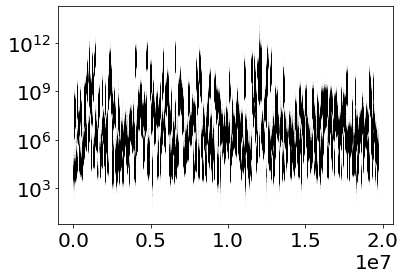

In [271]:
plt.plot(mainhalo_s_flux_mw, 'ko', ms=0.01)
plt.yscale('log')
#plt.ylim(1e4, 1e10)
#plt.xscale('log')
plt.show()

In [214]:
### Selecting the pixel size for the flux maps

pixel_size_in_deg = 2.5

resolution = np.radians(pixel_size_in_deg)

In [133]:
print(min(mainhalo_lon))
print(min(mainhalo_lon_flipped))

-3.2365619272902744
-5.955335180894392


In [134]:
print(min(mainhalo_lat))
print(min(mainhalo_lat_flipped))

-1.1629590458137549
-2.096576629978322


In [215]:

### Computing the JFactor maps


pixel_size = np.radians(pixel_size_in_deg)


theta_bin_width =pixel_size
phi_bin_width = pixel_size


theta_range_min = -np.radians(50) - np.radians(3)
phi_range_min = -np.radians(50) - np.radians(3)
theta_range_max = np.radians(50) + np.radians(3)
phi_range_max = np.radians(50) + np.radians(3)


theta_bin_edges = np.arange(theta_range_min, theta_range_max+theta_bin_width, theta_bin_width)
phi_bin_edges = np.arange(phi_range_min, phi_range_max+phi_bin_width, phi_bin_width)


num_of_pixels = len(theta_bin_edges)*len(phi_bin_edges)

print('there are ' , num_of_pixels , ' pixels')
    
    
    
selectionn_all_mw, selectionn_all_m31 = [], []
    
mainhalo_s_jfactor_smallpyr_total = []
bin_middle_all = []
mainhalo_s_flux_smooth_m31 = []

mainhalo_s_flux_smooth_mw = []

n = 0
time_list = []

num_of_particles_cut_m31 = []
stdev_all = []
    

mw_flux_cut = np.nanmean(mainhalo_s_flux_mw)+10*np.nanstd(mainhalo_s_flux_mw)
m31_flux_cut = np.nanmean(mainhalo_s_flux_m31)+10*np.nanstd(mainhalo_s_flux_m31)

mw_flux_mean = []
  
    
for theta_i in range(len(theta_bin_edges)-1):
    for phi_i in range(len(phi_bin_edges)-1):

        start_time = time.time()


        if (n%1000 == 0 and n > 10) or n == 50:
            print('')
            print('Estimated time remaining: ' , round(((num_of_pixels-n)*np.mean(time_list)) / 60, 1) , ' minutes.')
        n = n + 1

        bin_middle = [theta_bin_edges[theta_i] + theta_bin_width/2, phi_bin_edges[phi_i] + phi_bin_width/2]



        bin_middle_all.append(bin_middle)


        mainhalo_small_pyramid = np.logical_and(np.logical_and(mainhalo_lat >= theta_bin_edges[theta_i], mainhalo_lat < theta_bin_edges[theta_i + 1]), np.logical_and(mainhalo_lon >= phi_bin_edges[phi_i], mainhalo_lon < phi_bin_edges[phi_i + 1]))

        #print(len(mainhalo_small_pyramid))
            
            
        l_bins = np.arange(400, 1100, 1)
            
            
        dl = l_bins[1] - l_bins[0] 
                

        mainhalo_s_jfactor_smallpyr = []
                
                
            
            
            
        selectionn = np.array(mainhalo_s_flux_m31)[np.array(mainhalo_small_pyramid)[m31_smooth_cut]]
            
            
        anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*5
        #anomalous_cut = selectionn < np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])
        #anomalous_cut = selectionn > 0
            
            
            
            
            
            
        #mainhalo_s_flux_smooth_m31.append(np.nansum(selectionn[anomalous_cut]))
    
    
        num_of_particles_cut_m31.append(len(anomalous_cut[anomalous_cut == False]))
    
        
        stdev_all.append(np.nanstd(selectionn))
        
        
    
    
    
    
        
        
        
        #selectt = np.partition(selectionn[anomalous_cut].flatten(), -2)[:-4]
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        selectionn_all_m31.append(selectt)
        
        
        mainhalo_s_flux_smooth_m31.append(np.nansum(selectt))
        
        
        
        
        
        
        
        #print(np.nansum(selectionn[anomalous_cut]))
        '''
        if np.nansum(selectionn[anomalous_cut]) > 0:
            if np.nanmean(selectionn[anomalous_cut]) > 2e9:
                plt.plot(selectionn[anomalous_cut], 'ro', ms=1)
            else:
                plt.plot(selectionn[anomalous_cut], 'ko', ms=1)
            #plt.plot(selectionn[anomalous_cut][selectionn[anomalous_cut] > np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])], 'mo')
            plt.hlines(np.mean(selectionn[anomalous_cut]) + 0.1*np.nanstd(selectionn[anomalous_cut]),0, len(selectionn[anomalous_cut]), color='r', lw=2)
            plt.ylim(1e3, 1e14)
            plt.yscale('log')
            plt.show()
        '''
        
        
        
        
        selectionn = np.array(mainhalo_s_flux_mw)[np.array(mainhalo_small_pyramid)[mw_smooth_cut]]
        
        
        
        
        anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*5
        #anomalous_cut = selectionn < np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])
        #anomalous_cut = selectionn > 0
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        mainhalo_s_flux_smooth_mw.append(np.nansum(selectt))
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        
        #mainhalo_s_flux_smooth_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[np.array(mainhalo_small_pyramid)[mw_smooth_cut]]))
        
        
        #mainhalo_s_flux_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[mainhalo_small_pyramid][mw_smooth_cut]))
        
        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(mainhalo_s_jfactor_smallpyr))

        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(np.array(mainhalo_s_jfactor_smallpyr)[np.array(mainhalo_s_jfactor_smallpyr) < 1e9]))




        time_list.append(time.time()-start_time)

        if n % 1000 == 0:
            print('.' , end = '')



#print('bin middle length, ' , len(bin_middle_all))
  
### Chopping off the edges where there are pixels with underestimated flux values

    
    
chop_amount = np.radians(2)

bin_middle_all = np.array(bin_middle_all)

    
edge_cut = np.logical_and((np.logical_and((bin_middle_all[:,0] >= min(bin_middle_all[:,0])+chop_amount), (bin_middle_all[:,0] <= max(bin_middle_all[:,0])-chop_amount))),np.logical_and((bin_middle_all[:,1] >= min(bin_middle_all[:,1])+chop_amount), (bin_middle_all[:,1] <= max(bin_middle_all[:,1])-chop_amount)))

    

bin_middle_all_edgecut = bin_middle_all[edge_cut]


    
#mainhalo_s_jfactor_smallpyr_total_edgecut = np.array(mainhalo_s_jfactor_smallpyr_total)[edge_cut]


mainhalo_s_flux_smooth_edgecut_m31 = np.array(mainhalo_s_flux_smooth_m31)[edge_cut]



mainhalo_s_flux_smooth_edgecut_mw = np.array(mainhalo_s_flux_smooth_mw)[edge_cut]





c = np.array(mainhalo_s_flux_smooth_mw)[edge_cut]
    

#### Converting jfactor map bins to degrees

bin_middle_all_edgecut_deg = bin_middle_all_edgecut*(180/np.pi)




there are  1936  pixels


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: Mean of empty slice
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)



Estimated time remaining:  12.1  minutes.
.
Estimated time remaining:  6.0  minutes.


In [229]:
###TESTING

pixel_size = np.radians(pixel_size_in_deg)


theta_bin_width =pixel_size
phi_bin_width = pixel_size


theta_range_min = -np.radians(50) - np.radians(3)
phi_range_min = -np.radians(50) - np.radians(3)
theta_range_max = np.radians(50) + np.radians(3)
phi_range_max = np.radians(50) + np.radians(3)


theta_bin_edges = np.arange(theta_range_min, theta_range_max+theta_bin_width, theta_bin_width)
phi_bin_edges = np.arange(phi_range_min, phi_range_max+phi_bin_width, phi_bin_width)


num_of_pixels = len(theta_bin_edges)*len(phi_bin_edges)

print('there are ' , num_of_pixels , ' pixels')
    
    
    
selectionn_all_mw, selectionn_all_m31 = [], []
    
mainhalo_s_jfactor_smallpyr_total = []
bin_middle_all = []
mainhalo_s_flux_smooth_m31 = []

mainhalo_s_flux_smooth_mw = []

n = 0
time_list = []

num_of_particles_cut_m31 = []
stdev_all = []
    
for theta_i in range(len(theta_bin_edges)-1):
    for phi_i in range(len(phi_bin_edges)-1):

        start_time = time.time()


        if (n%1000 == 0 and n > 10) or n == 50:
            print('')
            print('Estimated time remaining: ' , round(((num_of_pixels-n)*np.mean(time_list)) / 60, 1) , ' minutes.')
        n = n + 1

        bin_middle = [theta_bin_edges[theta_i] + theta_bin_width/2, phi_bin_edges[phi_i] + phi_bin_width/2]



        bin_middle_all.append(bin_middle)


        mainhalo_small_pyramid = np.logical_and(np.logical_and(mainhalo_lat >= theta_bin_edges[theta_i], mainhalo_lat < theta_bin_edges[theta_i + 1]), np.logical_and(mainhalo_lon >= phi_bin_edges[phi_i], mainhalo_lon < phi_bin_edges[phi_i + 1]))

        #print(len(mainhalo_small_pyramid))
            
            
        l_bins = np.arange(400, 1100, 1)
            
            
        dl = l_bins[1] - l_bins[0] 
                

        mainhalo_s_jfactor_smallpyr = []
                
                
          
            
            
            
        selectionn = np.array(mainhalo_s_flux_m31)[np.array(mainhalo_small_pyramid)[m31_smooth_cut]]
            
            
        #anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*1
        anomalous_cut = selectionn > 0
        
        
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
            
        mainhalo_s_flux_smooth_m31.append(np.nansum(selectt))
    
    
        num_of_particles_cut_m31.append(len(anomalous_cut[anomalous_cut == False]))
    
        
        stdev_all.append(np.nanstd(selectionn))
        
        
        selectionn_all_m31.append(selectionn)
    
    
    
    
        
        selectionn = np.array(mainhalo_s_flux_mw)[np.array(mainhalo_small_pyramid)[mw_smooth_cut]]
        
        
        
        anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*3
        #anomalous_cut = selectionn < np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])
        #anomalous_cut = selectionn > 0
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        
        
        
        mainhalo_s_flux_smooth_mw.append(np.nansum(selectt))
        
        
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        


        time_list.append(time.time()-start_time)

        if n % 1000 == 0:
            print('.' , end = '')



#print('bin middle length, ' , len(bin_middle_all))
  
### Chopping off the edges where there are pixels with underestimated flux values

    
    
chop_amount = np.radians(2)

bin_middle_all = np.array(bin_middle_all)

    
edge_cut = np.logical_and((np.logical_and((bin_middle_all[:,0] >= -opening_angle+chop_amount), (bin_middle_all[:,0] < opening_angle-chop_amount))),np.logical_and((bin_middle_all[:,1] >= -opening_angle+chop_amount), (bin_middle_all[:,1] < opening_angle-chop_amount)))

    

bin_middle_all_edgecut = bin_middle_all[edge_cut]


    
#mainhalo_s_jfactor_smallpyr_total_edgecut = np.array(mainhalo_s_jfactor_smallpyr_total)[edge_cut]


mainhalo_s_flux_smooth_edgecut_m31 = np.array(mainhalo_s_flux_smooth_m31)[edge_cut]

mainhalo_s_flux_smooth_edgecut_mw = np.array(mainhalo_s_flux_smooth_mw)[edge_cut]
    

#### Converting jfactor map bins to degrees

bin_middle_all_edgecut_deg = bin_middle_all_edgecut*(180/np.pi)



there are  1936  pixels


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Mean of empty slice
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)



Estimated time remaining:  12.2  minutes.
.
Estimated time remaining:  6.0  minutes.


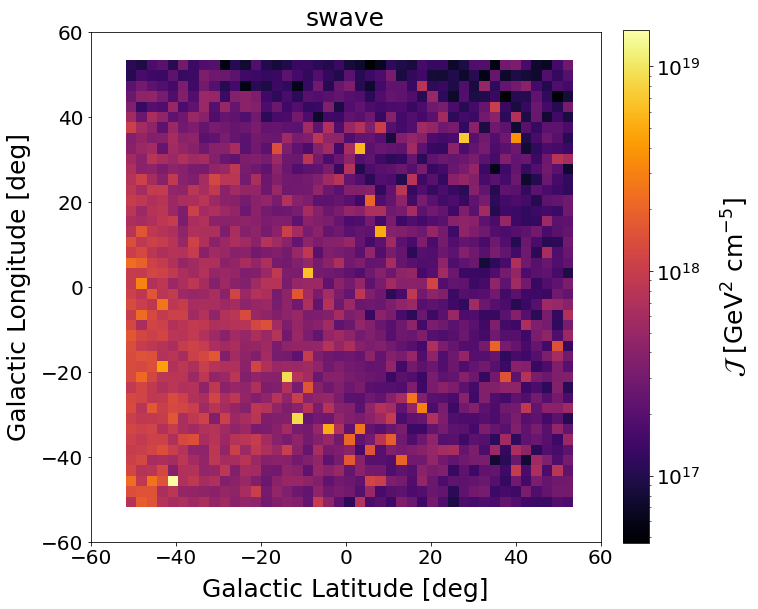

In [217]:
### Plotting the JFactor maps


conversion  = (4e56)**2 * (3.1e21)**(-5)
cmapp = 'plasma'
ff = 15
msss = 300
lpad = 10
lwww = 2
cm1 = cmapp
a = 0


wavee = ['som', 'swave', 'pwave', 'dwave']

res_label='0p5'



fig,axes = plt.subplots(1,1, figsize=(10,10), gridspec_kw={'width_ratios': [2],'height_ratios': [2],'wspace': 0.5,'hspace': 0.05})


#yy_smooth_m31 = mainhalo_s_jfactor_smallpyr_total_edgecut*conversion/np.radians(resolution)**2
   
#yy_smooth_m31 = mainhalo_s_flux_smooth_edgecut_m31*conversion/np.radians(resolution)**2
yy_smooth_m31 = mainhalo_s_flux_smooth_edgecut_m31*conversion
yy_smooth_reshaped_m31 = np.array(yy_smooth_m31).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg))), int(np.sqrt(len(bin_middle_all_edgecut_deg)))).T
yy_smooth_reshaped_m31 = np.rot90(yy_smooth_reshaped_m31, k=1)

#yy_smooth_mw = mainhalo_s_flux_smooth_edgecut_mw*conversion/np.radians(resolution)**2
yy_smooth_mw = mainhalo_s_flux_smooth_edgecut_mw*conversion
yy_smooth_reshaped_mw = np.array(yy_smooth_mw).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg))), int(np.sqrt(len(bin_middle_all_edgecut_deg)))).T
yy_smooth_reshaped_mw = np.rot90(yy_smooth_reshaped_mw, k=1)






#ratio = yy_smooth_reshaped_m31
#vminn=1e9 
#vmaxx=1e17




ratio = yy_smooth_reshaped_mw
#vminn=1e15
#vmaxx=1e18



        
        
for ss in range(len(ratio)):
    for pp in range(len(ratio[ss])):
        if ratio[ss][pp] <= 0:
            ratio[ss][pp] = np.nan
        
result = gaussian_filter(ratio , sigma=0)
        
        
        
#hdu = fits.PrimaryHDU(result)
#hdul = fits.HDUList([hdu])
#hdul.writeto('V1_05deg_background_smooth_swave_smoother.fits')
        


#vmin=1e10, vmax=1e17


im = axes.imshow(result, cmap = 'inferno', origin = 'lower', norm = LogNorm(), extent = [min(bin_middle_all_edgecut_deg[:,0]), max(bin_middle_all_edgecut_deg[:,0]), min(bin_middle_all_edgecut_deg[:,1]), max(bin_middle_all_edgecut_deg[:,1])])

axes.set_title('swave', fontsize=25)


cbar = plt.colorbar(im, ax=axes, fraction=0.046, pad=0.04)


cbar.ax.get_yaxis().labelpad = 20

cbar.ax.set_ylabel(r'$\mathcal{J}$ [GeV$^2$ cm$^{-5}$]', fontsize = 25)
        
        

cbar.ax.tick_params(labelsize=20)


axes.set_xlim(-60, 60)

axes.set_ylim(-60, 60)



axes.set_ylabel('Galactic Longitude [deg]', fontsize = 25, labelpad=lpad)
axes.set_xlabel('Galactic Latitude [deg]', fontsize = 25, labelpad=lpad)


axes.set_aspect('equal')



theta = np.linspace(0, 2*np.pi, 100)

r1= np.arctan(5.5/distt)*(180/np.pi)
r2= np.arctan(117/distt)*(180/np.pi)

plt.savefig('map.pdf')


plt.show()

In [ ]:
### Computing the plotting the JFactor plots

plt.figure(figsize=(10, 7))


for w in range(1):

    latlon_r = np.sqrt(bin_middle_all_edgecut_deg[:,0]**2 + bin_middle_all_edgecut_deg[:,1]**2)
    
    #latlon_r_bins = np.linspace(0, max(latlon_r),25)
    latlon_r_bins = np.arange(0, max(latlon_r),0.5)
    
    
    yy_smooth_mw_bins_som = []
    yy_sub_mw_bins_som = []
    yy_smooth_m31_bins_som = []
    yy_sub_m31_bins_som = []
    yy_ext_bins_som = []
    
    yy_smooth_mw_bins_s = []
    yy_sub_mw_bins_s = []
    yy_smooth_m31_bins_s = []
    yy_sub_m31_bins_s = []
    yy_ext_bins_s = []
    
    
    yy_smooth_mw_bins_p = []
    yy_sub_mw_bins_p = []
    yy_smooth_m31_bins_p = []
    yy_sub_m31_bins_p = []
    yy_ext_bins_p = []
    
    yy_smooth_mw_bins_d = []
    yy_sub_mw_bins_d = []
    yy_smooth_m31_bins_d = []
    yy_sub_m31_bins_d = []
    yy_ext_bins_d = []
    
    
    
    
    
    

    for ii in range(len(latlon_r_bins)-1):
        start = latlon_r_bins[ii]
        end = latlon_r_bins[ii+1]
        
        #domega = 2*np.pi * (np.cos(np.radians(start)) - np.cos(np.radians(end)))
        
        
        area = np.radians(np.pi * (end**2 - start**2))
        
        
        
        
        
        #yy_ext_bins_som.append(np.nansum(yy_sub_all_ext[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_som.append(np.nansum(yy_smooth_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_som.append(np.nansum(yy_sub_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_som.append(np.nansum(yy_smooth_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_som.append(np.nansum(yy_sub_all_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        
        
        #yy_ext_bins_s.append(np.nanmean(yy_sub_all_ext[1][np.logical_and((latlon_r >= start), (latlon_r < end))])*area_2/area)
        '''
        yy_smooth_mw_bins_s.append(np.nanmean(yy_smooth_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_smooth_m31_bins_s.append(np.nanmean(yy_smooth_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        '''
        yy_smooth_mw_bins_s.append(np.nanmean(yy_smooth_mw[np.logical_and((latlon_r >= start), (latlon_r < end))]))
        #yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))
        yy_smooth_m31_bins_s.append(np.nanmean(yy_smooth_m31[np.logical_and((latlon_r >= start), (latlon_r < end))]))
        #yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))

        
        

        
        
        #yy_ext_bins_p.append(np.nansum(yy_sub_all_ext[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_p.append(np.nansum(yy_smooth_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_p.append(np.nansum(yy_sub_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_p.append(np.nansum(yy_smooth_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_p.append(np.nansum(yy_sub_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)


        #yy_ext_bins_d.append(np.nansum(yy_sub_all_ext[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_d.append(np.nansum(yy_smooth_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_d.append(np.nansum(yy_sub_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_d.append(np.nansum(yy_smooth_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_d.append(np.nansum(yy_sub_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)





    width = latlon_r_bins[1] - latlon_r_bins[0]
    latlon_r_bin_middles = [latlon_r_bins[h]+(latlon_r_bins[h+1] - latlon_r_bins[h])/2 for h in range(len(latlon_r_bins)-1)]


    lww = 1
    lwww = 3
    
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_som))*conversion, 'r-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_som))*conversion, 'r-.', lw=lwww)
    
    
    plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_s))*conversion, 'b-.', lw=lwww, label='smooth mw')
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_s) + np.array(yy_sub_mw_bins_s))*conversion, 'b-.', lw=lww)
    plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_s))*conversion, 'b-', lw=lwww, label='smooth m31')
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_s) + np.array(yy_sub_m31_bins_s))*conversion, 'b-', lw=lww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_p))*conversion, 'y-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_p))*conversion, 'y-.', lw=lwww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_d))*conversion, 'g-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_d))*conversion, 'g-.', lw=lwww)
    
    
    

plt.rcParams['xtick.labelsize']=20

plt.rcParams['ytick.labelsize']=20
    
plt.yscale('log')

plt.xlim(0.02, 60)
plt.ylim(1e15, 1.2e24)


#plt.ylim(1e16, 1e26)

#plt.ticklabels(fontsize=20)

plt.legend(fontsize=20)


plt.ylabel(r'J-Factor [GeV$^2$ cm$^-5$]', fontsize=25)
plt.xlabel(r'$\theta$ [deg]', fontsize=25)
#plt.xscale('log')

plt.savefig('j_plot.pdf')

plt.show()

In [228]:

pixel_size = np.radians(pixel_size_in_deg)


theta_bin_width =pixel_size
phi_bin_width = pixel_size


theta_range_min = -np.radians(50) - np.radians(3)
phi_range_min = -np.radians(50) - np.radians(3)
theta_range_max = np.radians(50) + np.radians(3)
phi_range_max = np.radians(50) + np.radians(3)


theta_bin_edges = np.arange(theta_range_min, theta_range_max+theta_bin_width, theta_bin_width)
phi_bin_edges = np.arange(phi_range_min, phi_range_max+phi_bin_width, phi_bin_width)


num_of_pixels = len(theta_bin_edges)*len(phi_bin_edges)

print('there are ' , num_of_pixels , ' pixels')
    
    
    
selectionn_all_mw, selectionn_all_m31 = [], []
    
mainhalo_s_jfactor_smallpyr_total = []
bin_middle_all = []
mainhalo_s_flux_smooth_m31_flipped = []

mainhalo_s_flux_smooth_mw_flipped = []

n = 0
time_list = []

num_of_particles_cut_m31 = []
stdev_all = []
    
for theta_i in range(len(theta_bin_edges)-1):
    for phi_i in range(len(phi_bin_edges)-1):

        start_time = time.time()


        if (n%1000 == 0 and n > 10) or n == 50:
            print('')
            print('Estimated time remaining: ' , round(((num_of_pixels-n)*np.mean(time_list)) / 60, 1) , ' minutes.')
        n = n + 1

        bin_middle = [theta_bin_edges[theta_i] + theta_bin_width/2, phi_bin_edges[phi_i] + phi_bin_width/2]



        bin_middle_all.append(bin_middle)


        mainhalo_small_pyramid = np.logical_and(np.logical_and(mainhalo_lat_flipped >= theta_bin_edges[theta_i], mainhalo_lat_flipped < theta_bin_edges[theta_i + 1]), np.logical_and(mainhalo_lon_flipped >= phi_bin_edges[phi_i], mainhalo_lon_flipped < phi_bin_edges[phi_i + 1]))

        #print(len(mainhalo_small_pyramid))
            
            
        l_bins = np.arange(400, 1100, 1)
            
            
        dl = l_bins[1] - l_bins[0] 
                

        mainhalo_s_jfactor_smallpyr = []
                
                
        #for l_index in range(len(l_bins)-1):
        
    
        
            #l_main_cut = np.logical_and((mainhalo_r_pyr >= l_bins[l_index]), (mainhalo_r_pyr < l_bins[l_index+1]))
                
            #mainhalo_s_jfactor_smallpyr.append(np.nanmean(mainhalo_I_s_pyr[l_main_cut])*dl)
            
            
            
            #mainhalo_s_jfactor_smallpyr.append(np.nansum(mainhalo_I_s_pyr[l_main_cut])*dl)
            
            #mainhalo_s_jfactor_smallpyr.append(np.nansum(mainhalo_I_s_pyr[l_main_cut])*dl)
            
            
        #print(len(mainhalo_s_flux_m31))
        #print(len(DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut][m31_smooth_cut]))
        
        
        
          
            
            
            
        selectionn = np.array(mainhalo_s_flux_m31_flipped)[np.array(mainhalo_small_pyramid)[m31_smooth_cut_flipped]]
            
            
        #anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*1
        anomalous_cut = selectionn > 0
        
        
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
            
        mainhalo_s_flux_smooth_m31_flipped.append(np.nansum(selectt))
    
    
        num_of_particles_cut_m31.append(len(anomalous_cut[anomalous_cut == False]))
    
        
        stdev_all.append(np.nanstd(selectionn))
        
        
        selectionn_all_m31.append(selectionn)
    
    
    
    
        '''
        if np.nansum(selectionn) > 0.0:
        
            plt.plot(selectionn, 'ko')
            plt.hlines(np.nanmean(selectionn), 0, 200)
            plt.yscale('log')
            plt.show()
        
        '''
        
        selectionn = np.array(mainhalo_s_flux_mw_flipped)[np.array(mainhalo_small_pyramid)[mw_smooth_cut_flipped]]
        
        
        
        #anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*3
        #anomalous_cut = selectionn < np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])
        anomalous_cut = selectionn > 0
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        
        
        
        mainhalo_s_flux_smooth_mw_flipped.append(np.nansum(selectt))
        
        
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        
        #mainhalo_s_flux_smooth_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[np.array(mainhalo_small_pyramid)[mw_smooth_cut]]))
        
        
        #mainhalo_s_flux_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[mainhalo_small_pyramid][mw_smooth_cut]))
        
        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(mainhalo_s_jfactor_smallpyr))

        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(np.array(mainhalo_s_jfactor_smallpyr)[np.array(mainhalo_s_jfactor_smallpyr) < 1e9]))




        time_list.append(time.time()-start_time)

        if n % 1000 == 0:
            print('.' , end = '')



#print('bin middle length, ' , len(bin_middle_all))
  
### Chopping off the edges where there are pixels with underestimated flux values

    
    
chop_amount = np.radians(2)

bin_middle_all = np.array(bin_middle_all)

    
edge_cut = np.logical_and((np.logical_and((bin_middle_all[:,0] >= -opening_angle+chop_amount), (bin_middle_all[:,0] < opening_angle-chop_amount))),np.logical_and((bin_middle_all[:,1] >= -opening_angle+chop_amount), (bin_middle_all[:,1] < opening_angle-chop_amount)))

    

bin_middle_all_edgecut = bin_middle_all[edge_cut]


    
#mainhalo_s_jfactor_smallpyr_total_edgecut = np.array(mainhalo_s_jfactor_smallpyr_total)[edge_cut]


mainhalo_s_flux_smooth_edgecut_m31_flipped = np.array(mainhalo_s_flux_smooth_m31_flipped)[edge_cut]

mainhalo_s_flux_smooth_edgecut_mw_flipped = np.array(mainhalo_s_flux_smooth_mw_flipped)[edge_cut]
    

#### Converting jfactor map bins to degrees

bin_middle_all_edgecut_deg_flipped = bin_middle_all_edgecut*(180/np.pi)



there are  1936  pixels


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:158: RuntimeWarning: Mean of empty slice
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: Mean of empty slice
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)



Estimated time remaining:  12.2  minutes.
.
Estimated time remaining:  6.2  minutes.


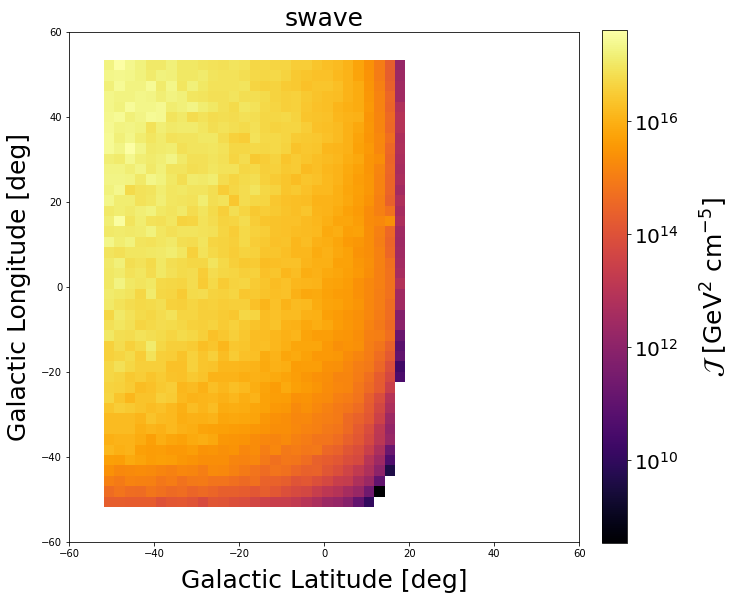

In [135]:
conversion  = (4e56)**2 * (3.1e21)**(-5)
cmapp = 'plasma'
ff = 15
msss = 300
lpad = 10
lwww = 2
cm1 = cmapp
a = 0


wavee = ['som', 'swave', 'pwave', 'dwave']

res_label='0p5'



fig,axes = plt.subplots(1,1, figsize=(10,10), gridspec_kw={'width_ratios': [2],'height_ratios': [2],'wspace': 0.5,'hspace': 0.05})


#yy_smooth_m31 = mainhalo_s_jfactor_smallpyr_total_edgecut*conversion/np.radians(resolution)**2
   
#yy_smooth_m31 = mainhalo_s_flux_smooth_edgecut_m31*conversion/np.radians(resolution)**2
yy_smooth_m31_flipped = mainhalo_s_flux_smooth_edgecut_m31_flipped*conversion
yy_smooth_reshaped_m31_flipped = np.array(yy_smooth_m31_flipped).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped))), int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped)))).T
yy_smooth_reshaped_m31_flipped = np.rot90(yy_smooth_reshaped_m31_flipped, k=1)

#yy_smooth_mw = mainhalo_s_flux_smooth_edgecut_mw*conversion/np.radians(resolution)**2
yy_smooth_mw_flipped = mainhalo_s_flux_smooth_edgecut_mw_flipped*conversion
yy_smooth_reshaped_mw_flipped = np.array(yy_smooth_mw_flipped).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped))), int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped)))).T
yy_smooth_reshaped_mw_flipped = np.rot90(yy_smooth_reshaped_mw_flipped, k=1)








ratio = yy_smooth_reshaped_m31_flipped
vminn=1e9 
vmaxx=1e17




#ratio = yy_smooth_reshaped_m31_flipped
#vminn=1e15
#vmaxx=1e18




        
        
for ss in range(len(ratio)):
    for pp in range(len(ratio[ss])):
        if ratio[ss][pp] <= 0:
            ratio[ss][pp] = np.nan
        
result = gaussian_filter(ratio , sigma=0)
        
        
        
#hdu = fits.PrimaryHDU(result)
#hdul = fits.HDUList([hdu])
#hdul.writeto('V1_05deg_foreground_smooth_swave.fits')
        





im = axes.imshow(result, cmap = 'inferno', origin = 'lower', norm = LogNorm(), extent = [min(bin_middle_all_edgecut_deg_flipped[:,0]), max(bin_middle_all_edgecut_deg_flipped[:,0]), min(bin_middle_all_edgecut_deg_flipped[:,1]), max(bin_middle_all_edgecut_deg_flipped[:,1])])

axes.set_title('swave', fontsize=25)


cbar = plt.colorbar(im, ax=axes, fraction=0.046, pad=0.04)


cbar.ax.get_yaxis().labelpad = 20

cbar.ax.set_ylabel(r'$\mathcal{J}$ [GeV$^2$ cm$^{-5}$]', fontsize = 25)
        
        

cbar.ax.tick_params(labelsize=20)



axes.set_xlim(-60, 60)

axes.set_ylim(-60, 60)

axes.set_ylabel('Galactic Longitude [deg]', fontsize = 25, labelpad=lpad)
axes.set_xlabel('Galactic Latitude [deg]', fontsize = 25, labelpad=lpad)


axes.set_aspect('equal')



theta = np.linspace(0, 2*np.pi, 100)

r1= np.arctan(5.5/distt)*(180/np.pi)
r2= np.arctan(117/distt)*(180/np.pi)

plt.savefig('map.pdf')


plt.show()

In [264]:
def pyramidFlagger(x, y, z, pyramid_peak, pyramid_midline, theta_halfrange, phi_halfrange):
    
    from astropy.coordinates import cartesian_to_spherical
    
    ### Put the peak at the center of the frame
    
    x = x - pyramid_peak[0]
    y = y - pyramid_peak[1]
    z = z - pyramid_peak[2]
    
    
    ### Converting to spherical coordinates
    
    r, theta, phi = cartesian_to_spherical(x, y, z)
    r = r.value
    theta = theta.value
    phi = phi.value
    
    #print('-----')
    #print([min(theta), max(theta)])
    #print([min(phi), max(phi)])
    
    
    
    ### Convert the m31 position to spherical coordinates
    
    r_, theta_, phi_ = cartesian_to_spherical(pyramid_midline[0], pyramid_midline[1], pyramid_midline[2])
    
    
    pyramid_midline_spherical = [r_.value, theta_.value, phi_.value]
    
    
        

    
    ### Define the "pyramid"
    
    theta_range = [pyramid_midline_spherical[1]- theta_halfrange, pyramid_midline_spherical[1]+ theta_halfrange]
    phi_range = [pyramid_midline_spherical[2]- phi_halfrange, pyramid_midline_spherical[2]+ phi_halfrange]
    
    
    if phi_range[1] > 2*np.pi:
        dd = phi_range[1] - 2*np.pi
        pyramid = np.logical_and((np.logical_and((theta >= min(theta_range)), (theta <= max(theta_range)))), (np.logical_or((phi >= min(phi_range)), (phi <= dd)))) 
    
    elif phi_range[0] < 0:
        dd = -phi_range[0] 
        pyramid = np.logical_and((np.logical_and((theta >= min(theta_range)), (theta <= max(theta_range)))), (np.logical_or((phi >= min(phi_range)), (phi >= 2*np.pi - dd)))) 
    
    else:
        pyramid = np.logical_and((np.logical_and((theta >= min(theta_range)), (theta <= max(theta_range)))), (np.logical_and((phi >= min(phi_range)), (phi <= max(phi_range))))) 
    
    
    plt.plot(theta, phi, 'ko', ms=0.1)
    plt.plot(theta_range[0], phi_range[0], 'ko' ,ms=10)
    plt.plot(theta_range[1], phi_range[1], 'mo' ,ms=10)
    plt.show()
    
    
    
    
    

    ### Define the condition to be within the pyramid
    
    #pyramid = np.logical_and((np.logical_and((theta >= min(theta_range)), (theta <= max(theta_range)))), (np.logical_and((phi >= min(phi_range)), (phi <= max(phi_range))))) 
    
    
    ### Extracting and returning particles within the cone
    
    x_pyr = x[pyramid]
    y_pyr = y[pyramid]
    z_pyr = z[pyramid]
    
    
    #return x_pyr, y_pyr, z_pyr, pyramid_midline_spherical, r_range, theta_range, phi_range

    return pyramid




def computeJFactorIntegrands(output, halo_to_analyze, DMcoords_galframe_pyr, DMvels_galframe_pyr, DMcoords_mainhalo_pyr, DMvels_mainhalo_pyr, subhalo_coords_galframe_pyr, subflags_pyr, groupflags_pyr, subgroupnum_pyr, groupnum_pyr, subhalo_size_flag_pyr, rmax_pyr, vmax_pyr, r200_mw, dm_mass, sub_mw, sub_m31, local_densities, inv_flag):
    
    

    
    c = 2.998e5
    
        
    mainhalo_mu_files = np.load(output + halo_to_analyze + '_mainhalo_mu.npz', allow_pickle = True)

    mainhalo_mu_s = mainhalo_mu_files['arr_1']
    mainhalo_mu_p = mainhalo_mu_files['arr_2']
    mainhalo_mu_d = mainhalo_mu_files['arr_3']
    mainhalo_mu_som = mainhalo_mu_files['arr_0']



    
    
    DM_xyz_smoothhalo = DMcoords_mainhalo_pyr
    DM_r_smoothhalo = np.sum(np.abs(DM_xyz_smoothhalo)**2,axis=-1)**(1./2)
    DM_v_xyz_smoothhalo = DMvels_mainhalo_pyr


    
    DM_r_mainhalo = DM_r_smoothhalo
    DM_xyz_mainhalo = DM_xyz_smoothhalo

    

    
    mainhalo_sommerfeld_integrands = (np.array(local_densities)**2)*(mainhalo_mu_som/(c**-1))
    print('Smooth halo sommerfeld integrand calculated')
    mainhalo_swave_integrands = (np.array(local_densities)**2)*(mainhalo_mu_s/(c**0))
    print('Smooth halo swave integrand calculated')
    mainhalo_pwave_integrands = (np.array(local_densities)**2)*(mainhalo_mu_p/(c**2))
    print('Smooth halo pwave integrand calculated')
    mainhalo_dwave_integrands = (np.array(local_densities)**2)*(mainhalo_mu_d/(c**4))
    print('Smooth halo dwave integrand calculated')


    mainhalo_som_I = mainhalo_sommerfeld_integrands
    mainhalo_s_I = mainhalo_swave_integrands
    mainhalo_p_I = mainhalo_pwave_integrands
    mainhalo_d_I = mainhalo_dwave_integrands


    ######################################################################################

    np.savez(output + halo_to_analyze + '_mainhalo_jfactor_integrand.npz', mainhalo_som_I, mainhalo_s_I, mainhalo_p_I, mainhalo_d_I)
    


                          
                               
                               
    ### Computing subhalo luminosities
                               
    
                               
    subhalo_mu_files = np.load(output + halo_to_analyze + '_subhalo_mu.npz', allow_pickle = True)

                              
    subhalo_mu_s = subhalo_mu_files['arr_0']
    subhalo_mu_p = subhalo_mu_files['arr_1']
    subhalo_mu_d = subhalo_mu_files['arr_2']    
    
    subhalo_mu_som = subhalo_mu_files['arr_3']

    
    DM_xyz = DMcoords_galframe_pyr
    DM_r = np.sum(np.abs(np.array(DM_xyz))**2,axis=-1)**(1./2)


    DM_v_xyz = DMvels_galframe_pyr


    subhalo_xyz = subhalo_coords_galframe_pyr
    subhalo_r = np.sum(np.abs(np.array(subhalo_xyz))**2,axis=-1)**(1./2)

                               
                               
                               
    subhalo_sommerfeld_integrands, subhalo_swave_integrands, subhalo_pwave_integrands, subhalo_dwave_integrands = subhaloJFactorIntegrands(DM_xyz, subhalo_xyz, subflags_pyr, groupflags_pyr, subgroupnum_pyr, groupnum_pyr, subhalo_size_flag_pyr,  subhalo_mu_som,  subhalo_mu_s,  subhalo_mu_p, subhalo_mu_d, rmax_pyr, vmax_pyr, r200_mw, dm_mass, sub_mw, sub_m31)

    
    
    #print('subhalo_som_I: ' , subhalo_som_I)
    
    subhalo_som_I = np.array(subhalo_sommerfeld_integrands)
    subhalo_s_I = np.array(subhalo_swave_integrands)
    subhalo_p_I = np.array(subhalo_pwave_integrands)
    subhalo_d_I = np.array(subhalo_dwave_integrands)#[np.array(subhalo_r) > 0]


    #subhalo_som_L_all.append(subhalo_som_L)
    #subhalo_s_L_all.append(subhalo_s_L)
    #subhalo_p_L_all.append(subhalo_p_L)
    #subhalo_d_L_all.append(subhalo_d_L)

    ###############################################################################################################


    np.savez(output + halo_to_analyze + '_subhalo_jfactor_integrand.npz', subhalo_som_I, subhalo_s_I, subhalo_p_I, subhalo_d_I)

    
    
    
    
    


def subhaloJFactorIntegrands(DM_xyz, subhalo_xyz, subflags, groupflags, subgroupnum, groupnum, subhalo_size_flag, mu_som, mu_s, mu_p, mu_d, rmax_calc, vmax_calc, halo_r200, dm_mass, mw_flag, m31_flag):

    c = 2.998e5
    
    
    DM_mass = dm_mass

    subhalo_sommerfeld_integrands, subhalo_swave_integrands, subhalo_pwave_integrands, subhalo_dwave_integrands = [], [], [], []

    rho0_best_all, r0_best_all = [], []

    halo_r200 = halo_r200

    DM_x = DM_xyz[:,0]
    DM_y = DM_xyz[:,1]
    DM_z = DM_xyz[:,2]

    sub_x = subhalo_xyz[:,0]
    sub_y = subhalo_xyz[:,1]
    sub_z = subhalo_xyz[:,2]
    i=0
    
    sub_number = len(set(subflags))
        


    #DMr_sub = np.sqrt(sub_DM_x**2 + sub_DM_y**2 + sub_DM_z**2)


    
    
    for sub_ind in range(len(subgroupnum)):
        
        
        
        groupflag = groupnum[sub_ind]
        subflag = subgroupnum[sub_ind]
        
        
        
        selection = np.logical_and((groupflags == groupflag), (subflags == subflag))



        DMx_sub = DM_x[selection] - sub_x[sub_ind]
        DMy_sub = DM_y[selection] - sub_y[sub_ind]
        DMz_sub = DM_z[selection] - sub_z[sub_ind]
        
        DMr_sub = np.sqrt(DMx_sub**2 + DMy_sub**2 + DMz_sub**2)



        

        if subflag == 0:
            subhalo_sommerfeld_integrands.append(0)
            subhalo_swave_integrands.append(0)
            subhalo_pwave_integrands.append(0)
            subhalo_dwave_integrands.append(0)
            
        
        else:

            print('Group ' , groupflag , ', Subhalo ' , subflag)


            selection = np.logical_and((groupflags == groupflag), (subflags == subflag))


            if len(DMr_sub) < 5:
                subhalo_size_flag[sub_ind] = 'small'


            vmax_ = vmax_calc[sub_ind]
            rmax = rmax_calc[sub_ind]




            if subhalo_size_flag[sub_ind] == 'large':

                # center coordinates on subhalo of interest and use only those particles
                DMx_sub = DM_x[selection] - sub_x[sub_ind]
                DMy_sub = DM_y[selection] - sub_y[sub_ind]
                DMz_sub = DM_z[selection] - sub_z[sub_ind]


                DMr_sub = np.sqrt(DMx_sub**2 + DMy_sub**2 + DMz_sub**2)


                mu_sommerfeld = mu_som[sub_ind]
                mu_swave = mu_s[sub_ind]
                mu_pwave = mu_p[sub_ind]
                mu_dwave = mu_d[sub_ind]
                
                

                Einasto_fits = np.empty((1,2), dtype = float)
                Einasto_density = np.empty((1,2), dtype = float)


                DMr_sub = np.sort(DMr_sub)

                v_circ = np.empty(DMr_sub.size, dtype = float)

                for j in range(0, v_circ.size):
                    v_circ[j] = np.sqrt(G * DM_mass*j / DMr_sub[j])

                if DMx_sub.size > 1000:
                    factor1 = 2.0
                    factor2 = 2.0
                else:
                    factor1 = 1.5
                    factor2 = 2.5

                first_Vmax = np.nanmax(v_circ)
                first_Rmax = DMr_sub[np.nanargmax(v_circ)]

                subset = np.nonzero(np.logical_and(DMr_sub >= (first_Rmax + softening_length)/2.0, DMr_sub <= 2.0 * first_Rmax)) # 0.37 kpc softening length
                DMr_subset = DMr_sub[subset]
                v_circ_subset = v_circ[subset]

                if DMr_subset.size > 3000:
                    r_interp = np.arange(DMr_subset[0], DMr_subset[-1], step = 0.05)
                    v_circ_interp_function = sci.interp1d(DMr_subset, v_circ_subset, bounds_error = False, fill_value = 'extrapolate')
                    v_circ_interp = v_circ_interp_function(r_interp)
                else:
                    r_interp = DMr_subset
                    v_circ_interp = v_circ_subset


                # to to fit an einasto circular velocity curve, if it fails then use original calculations
                try:

                    density, rarray, particles, volumes = density_profile(DMr_sub, DM_mass)
                    subset2 = np.nonzero(np.logical_and(rarray >= factor1 * softening_length, rarray <= factor2 * rmax))



                    density_notcut = density
                    rarray_notcut = rarray
                    volumes_notcut = volumes


                    density = density[subset2]
                    rarray = rarray[subset2]
                    volumes = volumes[subset2]





                    r0 = first_Rmax / 2.225
                    rho0 = first_Vmax**2.0 / (11.19 * G * r0**2.0)
                    p0 = (rho0, r0)


                    popt,pcov = curve_fit(einasto_density, rarray, density, p0, maxfev = 3000)

                    Einasto_density[i] = popt

                    try:
                        r = np.linspace(DMr_subset[0], DMr_subset[-1], num = 500, endpoint = True, dtype = float)
                        p0 = (popt[0], popt[1])
                        popt2,pcov2 = curve_fit(einasto_circular_velocity, r_interp, v_circ_interp, p0, maxfev = 3000)
                        einasto_v_circ_fit = einasto_circular_velocity(r, popt2[0], popt2[1])
                        Einasto_fits[i] = popt2
                    except:
                        Einasto_fits[i] = popt
                except:
                    try:
                        r0 = first_Rmax / 2.225 
                        rho0 = first_Vmax**2.0 / (11.19 * G * r0**2.0)
                        p0 = (rho0, r0)

                        popt2,pcov2 = curve_fit(einasto_circular_velocity, r_interp, v_circ_interp, p0, maxfev = 3000)
                        einasto_v_circ_fit = einasto_circular_velocity(r, popt2[0], popt2[1])
                        Einasto_fits[i] = popt2
                        Einasto_density[i] = popt2
                    except:
                        Einasto_fits[i,0] = np.nan
                        Einasto_fits[i,1] = np.nan
                        Einasto_density[i,0] = np.nan
                        Einasto_density[i,1] = np.nan







                density_fit_notcut = [einasto_density(xxx, Einasto_fits[0][0], Einasto_fits[0][1]) for xxx in rarray_notcut]



                if len(np.array(rarray_notcut)[np.array(rarray_notcut) > rmax]) < 1:
                    density_fit_cut = density_fit_notcut
                    rarray_cut = rarray_notcut
                    density_cut = density_notcut
                    volumes_cut = volumes_notcut
                else:
                    density_fit_cut = np.array(density_fit_notcut)[np.logical_and(np.array(rarray_notcut) < rmax, np.array(rarray_notcut) > 0)]
                    rarray_cut = np.array(rarray_notcut)[np.logical_and(np.array(rarray_notcut) < rmax, np.array(rarray_notcut) > 0)]
                    density_cut = np.array(density_notcut)[np.logical_and(np.array(rarray_notcut) < rmax, np.array(rarray_notcut) > 0)]
                    volumes_cut = np.array(volumes_notcut)[np.logical_and(np.array(rarray_notcut) < rmax, np.array(rarray_notcut) > 0)]



                ### Modified calculation
                integrand_som = (np.array(density_fit_cut)**2)*(mu_sommerfeld/(c**-1))
                integrand_s = (np.array(density_fit_cut)**2)*(mu_swave/(c**0))
                integrand_p = (np.array(density_fit_cut)**2)*(mu_pwave/(c**2))
                integrand_d = (np.array(density_fit_cut)**2)*(mu_dwave/(c**4))




                 # Now calculating the luminosity from outside of Rmax if the subhalo has more than 5 particles outside of rmax
                if len(DMx_sub[DMr_sub > rmax]) <= 5:
                    integrand_som_outer = []
                    integrand_s_outer = []
                    integrand_p_outer = []
                    integrand_d_outer = []



                else:

                    DMx_sub_outer = DMx_sub[DMr_sub > rmax]
                    DMy_sub_outer = DMy_sub[DMr_sub > rmax]
                    DMz_sub_outer = DMz_sub[DMr_sub > rmax]


                    DM_xyz_sub_outer = np.array(list(zip(DMx_sub_outer, DMy_sub_outer, DMz_sub_outer)))





                    DM_r_sub_outer =  np.sum(np.abs(DM_xyz_sub_outer)**2,axis=-1)**(1./2)



                    voll_sub_outer = voronoi_volumes(DM_xyz_sub_outer)


                    local_densities = dm_mass/np.array(voll_sub_outer)


                    DM_r_sub_outer = DM_r_sub_outer[local_densities > 0]
                    DM_xyz_sub_outer = DM_xyz_sub_outer[local_densities > 0]
                    voronoi_volume = voll_sub_outer[local_densities > 0]
                    local_densities = local_densities[local_densities > 0]


                    
                    ### Modified calculation
                    integrand_som_outer = (np.array(local_densities)**2)*(mu_sommerfeld/(c**-1))
                    integrand_s_outer = (np.array(local_densities)**2)*(mu_swave/(c**0))
                    integrand_p_outer = (np.array(local_densities)**2)*(mu_pwave/(c**2))
                    integrand_d_outer = (np.array(local_densities)**2)*(mu_dwave/(c**4))








                subhalo_sommerfeld_integrands.append(np.sum(integrand_som) + np.sum(integrand_som_outer))
                subhalo_swave_integrands.append(np.sum(integrand_s) + np.sum(integrand_s_outer))
                subhalo_pwave_integrands.append(np.sum(integrand_p) + np.sum(integrand_p_outer))
                subhalo_dwave_integrands.append(np.sum(integrand_d) + np.sum(integrand_d_outer))








            if subhalo_size_flag[sub_ind] == 'small':



                integrand_som = (mu_sommerfeld/(c**(-1)))*((1.87*(vmax_calc[sub_ind]**4))/((G**2)*((4/3)*np.pi)*(rmax_calc[sub_ind])**4))
                integrand_s = (mu_swave/(c**(0)))*((1.87*(vmax_calc[sub_ind]**4))/((G**2)*((4/3)*np.pi)*(rmax_calc[sub_ind])**4))
                integrand_p = (mu_pwave/(c**(2)))*((1.87*(vmax_calc[sub_ind]**4))/((G**2)*((4/3)*np.pi)*(rmax_calc[sub_ind])**4))
                integrand_d = (mu_dwave/(c**(4)))*((1.87*(vmax_calc[sub_ind]**4))/((G**2)*((4/3)*np.pi)*(rmax_calc[sub_ind])**4))


                subhalo_sommerfeld_integrands.append(integrand_som)
                subhalo_swave_integrands.append(integrand_s)
                subhalo_pwave_integrands.append(integrand_p)
                subhalo_dwave_integrands.append(integrand_d)


        sub_ind += 1
            
            
            
            
    return subhalo_sommerfeld_integrands, subhalo_swave_integrands, subhalo_pwave_integrands, subhalo_dwave_integrands





In [265]:
import time



#subhalo_mu_func(datapathh_flipped, halo_to_analyze, dm_mass, DM_coords_galframe_flipped, DM_vels_galframe_flipped, subhalo_coords_galframe_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], subhalo_vels_galframe_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], subflags_mw_m31_flipped, groupflags_mw_m31_flipped, subgroupnum_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], groupnum_mw_m31_flipped[np.logical_and((subhalo_big_cut_flipped), (subhalo_mainhalo_cut_flipped))], sub_mw_flipped, sub_m31_flipped, fof_mw_flipped, fof_m31_flipped)



def subhalo_mu_func(output, halo_to_analyze, dm_mass, DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, subflags, groupflags, subgroupnum, groupnum, sub_mw, sub_m31, fof_mw, fof_m31):

    average_peak = mean_maxwell_func(dm_mass, DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, subflags, groupflags, subgroupnum, groupnum, sub_mw, sub_m31, fof_mw, fof_m31)
    average_peak = np.array(average_peak)
    
    mu_s, mu_p, mu_d, mu_som = find_mu(average_peak)
    
    np.savez(output + halo_to_analyze + '_subhalo_mu.npz', mu_s, mu_p, mu_d, mu_som)
    
    


def mean_maxwell_func(dm_mass, DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, subflags, groupflags, subgroupnum, groupnum, sub_mw, sub_m31, fof_mw, fof_m31):



    average_peak = []


    DM_x = DM_coords_galframe[:,0]
    DM_y = DM_coords_galframe[:,1]
    DM_z = DM_coords_galframe[:,2]

    sub_x = subhalo_coords_galframe[:,0]
    sub_y = subhalo_coords_galframe[:,1]
    sub_z = subhalo_coords_galframe[:,2]

    DM_v_x = DM_vels_galframe[:,0]
    DM_v_y = DM_vels_galframe[:,1]
    DM_v_z = DM_vels_galframe[:,2]

    sub_v_x = subhalo_vels_galframe[:,0]
    sub_v_y = subhalo_vels_galframe[:,1]
    sub_v_z = subhalo_vels_galframe[:,2]


    
    u = 0
    
    print(len(subgroupnum) , ' subhalos')
    
    
    
    timelist = []
    
    iii = 0

    for sub_ind in range(len(subgroupnum)):

        start_time = time.time()

        groupflag = groupnum[sub_ind]
        subflag = subgroupnum[sub_ind]

        if np.logical_and((subflag == sub_mw), (groupflag == fof_mw)) or np.logical_and((subflag == sub_m31), (groupflag == fof_m31)):
            average_peak.append(0)

        else:

            #print('Group ' , groupflag , ', Subhalo ' , subflag)
            
            print(u , end = ' ')
            
            u = u + 1
            selection = np.logical_and((groupflags == groupflag), (subflags == subflag))



            # center coordinates on subhalo of interest and use only those particles
            sub_DM_x = DM_x[selection] - sub_x[sub_ind]
            sub_DM_y = DM_y[selection] - sub_y[sub_ind]
            sub_DM_z = DM_z[selection] - sub_z[sub_ind]


            sub_DM_r = np.sqrt(sub_DM_x**2 + sub_DM_y**2 + sub_DM_z**2)

            sub_DM_v_x = DM_v_x[selection] - sub_v_x[sub_ind]
            sub_DM_v_y = DM_v_y[selection] - sub_v_y[sub_ind]
            sub_DM_v_z = DM_v_z[selection] - sub_v_z[sub_ind]

            #plt.plot(sub_DM_x, sub_DM_y, 'ko', ms=0.1)
            #plt.show()


            if len(sub_DM_r) < 5:
                average_peak.append(0)


            else:

                density, rarray, particles, volumes = density_profile(sub_DM_r, dm_mass)


                if rarray.size-1 < 1: 
                    average_peak.append(0)

                else:

                    s_wave = np.empty(rarray.size-1, dtype = float)

                    peak = np.empty(rarray.size-1, dtype = float)

                    bins = 100
                    # store the f(vrel) data for all radial bins
                    vrel_array = np.empty((rarray.size-1,bins+1), dtype = float)
                    Prel_array = np.empty((rarray.size-1,bins), dtype = float)

                    cutDMx, cutDMy, cutDMz, cutDMvx, cutDMvy, cutDMvz = cut(rarray,sub_DM_r,sub_DM_x,sub_DM_y,sub_DM_z,sub_DM_v_x,sub_DM_v_y,sub_DM_v_z,particles)

                    for i in range(0,s_wave.size):
                        #print('Bin ' + str(i+1) + ' of ' + str(rarray.size-1), end = ' ')

                        # nearest neighbor vrel
                        aperature = 0.5 * 4.0 * np.sqrt(4*np.pi*rarray[i+1]**2.0/particles)
                        DM_vmod = vdist(cutDMx[i], cutDMy[i], cutDMz[i], cutDMvx[i],cutDMvy[i],cutDMvz[i], ap = aperature)

                        # f(vrel) distribution
                        Prel, vrel = np.histogram(DM_vmod, bins=bins, density=True)

                        vrel_array[i] = vrel
                        Prel_array[i] = Prel

                        mu, sigma = find_sigma(Prel, vrel)

                        peak[i] = sigma



                    average_peak.append(np.nanmean(peak))
                    
                    
                    
        timelist.append(time.time()-start_time)
        
        iii=iii+1
        
        if iii%30 == 0:
            print(len(subgroupnum)*np.nanmean(timelist)/3600 , ' hours remaining')
            

    return average_peak




In [207]:
def density_profile(r, mass):
    if r.size > 10000:
        particles = 200
    elif r.size > 1000:
        particles = 50
    else:
        particles = 5
    
    r = np.sort(r)
    
    rarray = find_radii_same_particles(r, 0.0, r[-1], particles)
    density = np.empty(rarray.size-1, dtype = float)

    volumes = []
    
    for i in range(0,density.size):
        # volume = (4.0/3.0) * np.pi * ((rarray[i+1])**3.0 - (rarray[i])**3.0) *3.086e21**3.0
        # density[i] = particles * mass * 1.116e57 / volume
        volume = (4.0/3.0) * np.pi * ((rarray[i+1])**3.0 - (rarray[i])**3.0)
        volumes.append(volume)
        density[i] = particles * mass / volume
        
    rarray = 0.5 * (rarray[1:] + rarray[:-1])
    
    return density, rarray, particles, volumes



def mainhalo_density_func(output, halo_to_analyze, DMcoords_mainhalo_pyr, dm_mass):

    import time 
    
    start_time = time.time()
    
    voll_main_halo = voronoi_volumes(DMcoords_mainhalo_pyr)

    np.save(output + halo_to_analyze + '_voronoi_mainhalo.npy', voll_main_halo)
    
    print(time.time()-start_time)

    
    

    
    
    
def mean_maxwell(DM_mass, DM_coords, DM_vel, subhalo_pos, Subflag, subgroupnum, mw_flag, m31_flag):

    DM_x = DM_coords[:,0]
    DM_y = DM_coords[:,1]
    DM_z = DM_coords[:,2]
    
    sub_x = subhalo_pos[:,0]
    sub_y = subhalo_pos[:,1]
    sub_z = subhalo_pos[:,2]
    
    DM_v_x = DM_vel[:,0]
    DM_v_y = DM_vel[:,1]
    DM_v_z = DM_vel[:,2]
    
   
    
    sub_number = len(set(Subflag))
        
        
    average_peak = []

    
    sub_ind = 0
    
    
    
    for subhalo in subgroupnum:
        
        
        print(subhalo , ' ' , sub_ind)
        
        
        
        if subhalo == mw_flag or subhalo == m31_flag:
            
            average_peak.append(0)


        else:
        
            # print('Subhalo ' + str(subhalo) + ' of ' + str(J.size))
            subhalo_index = np.nonzero(Subflag == subhalo)

            # center coordinates on subhalo of interest and use only those particles
            sub_DM_x = DM_x[subhalo_index] - sub_x[sub_ind]
            sub_DM_y = DM_y[subhalo_index] - sub_y[sub_ind]
            sub_DM_z = DM_z[subhalo_index] - sub_z[sub_ind]

            sub_ind += 1


            #sub_DM_x = DM_x[subhalo_index] - sub_x[subhalo-1]
            #sub_DM_y = DM_y[subhalo_index] - sub_y[subhalo-1]
            #sub_DM_z = DM_z[subhalo_index] - sub_z[subhalo-1]


            sub_DM_r = np.sqrt(sub_DM_x**2 + sub_DM_y**2 + sub_DM_z**2)

            sub_DM_v_x = DM_v_x[subhalo_index]
            sub_DM_v_y = DM_v_y[subhalo_index]
            sub_DM_v_z = DM_v_z[subhalo_index]


            if len(sub_DM_r) < 5:

                print(0)

                average_peak.append(0)


            else:

                density, rarray, particles, volumes = density_profile(sub_DM_r, DM_mass)


                if rarray.size-1 < 1: 

                    print(0)

                    average_peak.append(0)

                else:

                    s_wave = np.empty(rarray.size-1, dtype = float)

                    peak = np.empty(rarray.size-1, dtype = float)

                    bins = 100
                    # store the f(vrel) data for all radial bins
                    vrel_array = np.empty((rarray.size-1,bins+1), dtype = float)
                    Prel_array = np.empty((rarray.size-1,bins), dtype = float)

                    cutDMx, cutDMy, cutDMz, cutDMvx, cutDMvy, cutDMvz = cut(rarray,sub_DM_r,sub_DM_x,sub_DM_y,sub_DM_z,sub_DM_v_x,sub_DM_v_y,sub_DM_v_z,particles)

                    for i in range(0,s_wave.size):
                        #print('Bin ' + str(i+1) + ' of ' + str(rarray.size-1), end = ' ')

                        # nearest neighbor vrel
                        aperature = 0.5 * 4.0 * np.sqrt(4*np.pi*rarray[i+1]**2.0/particles)
                        DM_vmod = vdist(cutDMx[i], cutDMy[i], cutDMz[i], cutDMvx[i],cutDMvy[i],cutDMvz[i], ap = aperature)

                        # f(vrel) distribution
                        Prel, vrel = np.histogram(DM_vmod, bins=bins, density=True)

                        
                        
                        vrel_array[i] = vrel
                        Prel_array[i] = Prel
                        
                        
                        

                        mu, sigma = find_sigma(Prel, vrel)

                        peak[i] = sigma


                    print(np.nanmean(peak))

                    average_peak.append(np.nanmean(peak))

    return average_peak
    
    
    
    
    
    
    
def generateSphericalArray(radius, spacing):
    
    coords = np.mgrid[-radius-spacing:radius+spacing:spacing, -radius-spacing:radius+spacing:spacing, -radius-spacing:radius+spacing:spacing].reshape(3,-1).T
    
    coords = coords[np.sum(np.abs(coords)**2,axis=-1)**(1./2) <= radius]
    
    return coords
    
    
    
    
def mainhalo_mu_func(output, halo_to_analyze, DMcoords_mainhalo_pyr, DMvels_mainhalo_pyr, dm_mass, ctr_mw_galframe, ctr_m31_galframe, r200_mw, r200_m31):

    import time
    
    
    #smooth_halo_voronoi = np.load(output + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)

    DM_xyz_smoothhalo = DMcoords_mainhalo_pyr

    DM_r_smoothhalo = np.sum(np.abs(DM_xyz_smoothhalo)**2,axis=-1)**(1./2)
    DM_r_smoothhalo_mw = np.sum(np.abs(DM_xyz_smoothhalo - ctr_mw_galframe)**2,axis=-1)**(1./2)
    DM_r_smoothhalo_m31 = np.sum(np.abs(DM_xyz_smoothhalo - ctr_m31_galframe)**2,axis=-1)**(1./2)

    DM_r_smoothhalo_ctr = np.sum(np.abs(DM_xyz_smoothhalo - (np.array(ctr_m31_galframe)+np.array(ctr_mw_galframe))/2)**2,axis=-1)**(1./2)


    
    DM_v_xyz_smoothhalo = DMvels_mainhalo_pyr



    halo_r200 = 100



    hull_mw = ConvexHull(DM_xyz_smoothhalo[DM_r_smoothhalo_mw < 400])
    hull_m31 = ConvexHull(DM_xyz_smoothhalo[DM_r_smoothhalo_m31 < 400])

    hull_ctr = ConvexHull(DM_xyz_smoothhalo[DM_r_smoothhalo_ctr <= max(DM_r_smoothhalo_ctr)])


    spacingg = 65
    spherical_points = generateSphericalArray(max(abs(DM_r_smoothhalo)), spacingg)
    
    spacingg_outer = 100
    spherical_points_outer = generateSphericalArray(max(abs(DM_r_smoothhalo)), spacingg_outer)
    
    #spherical_points = generateSphericalArray(max(abs(DM_r_smoothhalo_ctr)), spacingg)


    
    spherical_points_mw = [spherical_points[j] for j in range(len(spherical_points)) if isInHull(np.array(spherical_points[j]), hull_mw) == True]
    spherical_points_m31 = [spherical_points[j] for j in range(len(spherical_points)) if isInHull(np.array(spherical_points[j]), hull_m31) == True]

    spherical_points_ctr = [spherical_points_outer[j] for j in range(len(spherical_points_outer)) if isInHull(np.array(spherical_points_outer[j]), hull_ctr) == True]


    
    
    spherical_points_padding = generateSphericalArray(max(abs(DM_r_smoothhalo)),5*spacingg)
    spherical_points_padding = spherical_points_padding[np.sum(np.abs(spherical_points_padding)**2,axis=-1)**(1./2) > 400]
    #spherical_points = list(spherical_points) + list(spherical_points_padding)
    #spherical_points = list(spherical_points_mw) + list(spherical_points_m31) + list(spherical_points_padding)
    #spherical_points = list(spherical_points)

    spherical_points = list(spherical_points_mw) + list(spherical_points_m31) + list(spherical_points_ctr) 
    
    
    print(len(spherical_points), ' points')
    #print('will take approximately ' , np.round(len(spherical_points)*2/3600,2) , ' hours')


    plt.plot(DM_xyz_smoothhalo[:,0], DM_xyz_smoothhalo[:,1], 'ko', ms=0.005)
    plt.plot(np.array(spherical_points)[:,0], np.array(spherical_points)[:,1], 'ro', ms=4)
    #`plt.plot(np.array(spherical_points_padding)[:,0], np.array(spherical_points_padding)[:,1], 'bo', ms=4)


    plt.show()
    

    
    
    ### Calculating mu at each point in the array over the smooth halo

    mu_sommerfeld_all, mu_swave_all, mu_pwave_all, mu_dwave_all = [], [], [], []

    
    time_list = []
    

    for i in range(len(spherical_points)):

        start_time = time.time()

        print(i, end = ' ')

        dist = DM_xyz_smoothhalo - spherical_points[i]
        dist_mags = np.sum(np.abs(dist)**2,axis=-1)**(1./2)
        idx =  np.argpartition(dist_mags, 500)[:500]   
        DMvels_500 = DM_v_xyz_smoothhalo[idx]
        DMcoords_500 = DM_xyz_smoothhalo[idx]


        mu_swave, mu_pwave, mu_dwave, mu_sommerfeld = find_mu_mean_maxwell_smooth(dm_mass, DMcoords_500, DMvels_500, spherical_points[i])


        mu_sommerfeld_all.append(mu_sommerfeld)
        mu_swave_all.append(mu_swave)
        mu_pwave_all.append(mu_pwave)
        mu_dwave_all.append(mu_dwave)
        
        
        time_list.append(time.time()-start_time)
        
        if i % 75 == 0 or i == 10:
            
            print('will take approximately ' , np.round((len(spherical_points)-i)*np.mean(time_list)/3600, 2) , ' hours')



    
    mu_sommerfeld_interpf = LinearNDInterpolator(list(spherical_points), list(mu_sommerfeld_all))
    mu_swave_interpf = LinearNDInterpolator(list(spherical_points), list(mu_swave_all))
    mu_pwave_interpf = LinearNDInterpolator(list(spherical_points), list(mu_pwave_all))
    mu_dwave_interpf = LinearNDInterpolator(list(spherical_points), list(mu_dwave_all))


    
    
    DM_r_mainhalo = DM_r_smoothhalo
    DM_xyz_mainhalo = DM_xyz_smoothhalo


    local_mu_som =  mu_sommerfeld_interpf(np.array(DM_xyz_mainhalo))
    print('Smooth halo sommerfeld inteprolation calculated')
    local_mu_s =  mu_swave_interpf(np.array(DM_xyz_mainhalo))   
    print('Smooth halo swave inteprolation calculated')
    local_mu_p =  mu_pwave_interpf(np.array(DM_xyz_mainhalo)) 
    print('Smooth halo pwave inteprolation calculated')
    local_mu_d =  mu_dwave_interpf(np.array(DM_xyz_mainhalo))
    print('Smooth halo dwave inteprolation calculated')
    

    
    np.savez(output + halo_to_analyze + '_mainhalo_mu.npz', local_mu_som, local_mu_s, local_mu_p, local_mu_d)









In [208]:
def loadInData_ExtractWedgeOfInterest(halo_to_analyze, opening_angle, towards_mw_or_m31):
    
    
    HR_halos = ['V1_HR_fix','V4_HR_fix','V6_HR_fix','S4_HR_fix','S5_HR_fix']
    
    if towards_mw_or_m31 == 'm31':
        galaxy_center_flag = 'mw'

    if towards_mw_or_m31 == 'mw':
        galaxy_center_flag = 'm31'

    gal_data, DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag, subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31, groupnum_mw_m31, rmax_mw_m31, vmax_mw_m31 = loadApostle(halo_to_analyze+'_HR_fix', galaxy_center_flag)

    ctr_m31_galframe = np.array([ctr_m31_galframe[0][0], ctr_m31_galframe[1][0], ctr_m31_galframe[2][0]])


    
    if towards_mw_or_m31 == 'm31':
    
        subhalo_pyramid_flag = pyramidFlagger(subhalo_coords_galframe[0], subhalo_coords_galframe[1], subhalo_coords_galframe[2], [-8, 0, 0], ctr_m31_galframe, opening_angle, opening_angle)
        DM_pyramid_flag = pyramidFlagger(DM_coords_galframe[0], DM_coords_galframe[1], DM_coords_galframe[2], [-8, 0, 0], ctr_m31_galframe, opening_angle, opening_angle)


    else:
        
        subhalo_pyramid_flag = pyramidFlagger(subhalo_coords_galframe[0], subhalo_coords_galframe[1], subhalo_coords_galframe[2], [-8, 0, 0], ctr_mw_galframe, opening_angle, opening_angle)
        DM_pyramid_flag = pyramidFlagger(DM_coords_galframe[0], DM_coords_galframe[1], DM_coords_galframe[2], [-8, 0, 0], ctr_mw_galframe, opening_angle, opening_angle)


    
    
    ### Extracting all subhalos that are within the defined cone

    subhalo_selection = subhalo_pyramid_flag
    subhalo_size_flag_pyr = np.array(subhalo_size_flag)[subhalo_selection]
    
    subhalo_coords_galframe_pyr_x = np.array(subhalo_coords_galframe[0])[subhalo_selection]
    subhalo_coords_galframe_pyr_y = np.array(subhalo_coords_galframe[1])[subhalo_selection]
    subhalo_coords_galframe_pyr_z = np.array(subhalo_coords_galframe[2])[subhalo_selection]

    rmax_pyr = rmax_mw_m31[subhalo_selection]
    vmax_pyr = vmax_mw_m31[subhalo_selection]
    subgroupnum_pyr = subgroupnum_mw_m31[subhalo_selection]

    subhalo_coords_galframe_pyr =  np.array(list(zip(subhalo_coords_galframe_pyr_x, subhalo_coords_galframe_pyr_y, subhalo_coords_galframe_pyr_z))) 



    
    ### Extracting all DM particles that are within the defined cone


    DM_selection = DM_pyramid_flag
    
    DM_coords_galframe_pyr_x = np.array(np.array(DM_coords_galframe[0]))[DM_selection]
    DM_coords_galframe_pyr_y = np.array(np.array(DM_coords_galframe[1]))[DM_selection]
    DM_coords_galframe_pyr_z = np.array(np.array(DM_coords_galframe[2]))[DM_selection]

    subflags_pyr = subflags_mw_m31[DM_selection]
    DMcoords_galframe_pyr =  np.array(list(zip(DM_coords_galframe_pyr_x, DM_coords_galframe_pyr_y, DM_coords_galframe_pyr_z)))

    DM_vels_galframe_pyr_x = np.array(np.array(DM_vels_galframe[0]))[DM_selection]
    DM_vels_galframe_pyr_y = np.array(np.array(DM_vels_galframe[1]))[DM_selection]
    DM_vels_galframe_pyr_z = np.array(np.array(DM_vels_galframe[2]))[DM_selection]

    DMvels_galframe_pyr =  np.array(list(zip(DM_vels_galframe_pyr_x, DM_vels_galframe_pyr_y, DM_vels_galframe_pyr_z)))

    
    
    ### Extract mainhalo
    
    DMcoords_mainhalo_pyr = DMcoords_galframe_pyr[np.logical_or((subflags_pyr == gal_data.sub_mw), (subflags_pyr == gal_data.sub_m31))]
    DMvels_mainhalo_pyr = DMvels_galframe_pyr[np.logical_or((subflags_pyr == gal_data.sub_mw), (subflags_pyr == gal_data.sub_m31))]

    
    
    
    
    
    return gal_data, halo_to_analyze, subhalo_coords_galframe_pyr, subgroupnum_pyr, DMcoords_galframe_pyr, DMvels_galframe_pyr, subflags_pyr, vmax_pyr, rmax_pyr, DMcoords_mainhalo_pyr, DMvels_mainhalo_pyr, subgroupnum_pyr, subhalo_coords_galframe_pyr, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag_pyr






def computeAndTransformToGalacticFrameOfSelectedGalaxy(DM_coords, DM_vels, subhalo_coords, subhalo_vels, S_coords, S_vels, ctr_mw, vel_mw, ctr_m31, vel_m31, rmax_mw_m31, galaxy_flag):
    
    
    if galaxy_flag == 'mw':
        ctr_gal = ctr_mw
        vel_gal = vel_mw
        
        
    else:
        ctr_gal = ctr_m31
        vel_gal = vel_m31
        
        
        
        
    
    ### Transforming all particles and subhalos to the selected galaxy reference frame
        
    S_coords_ctr_gal = S_coords - ctr_gal
    S_coords_r_ctr_gal = np.sqrt((S_coords_ctr_gal*S_coords_ctr_gal).sum(axis=1))
    S_vels_wrt_gal = S_vels - vel_gal
        
    DM_coords_ctr_gal = DM_coords - ctr_gal
    DM_coords_r_ctr_gal = np.sqrt((DM_coords_ctr_gal*DM_coords_ctr_gal).sum(axis=1))
    DM_vels_wrt_gal = DM_vels - vel_gal
        
    subhalo_coords_ctr_gal = subhalo_coords - ctr_gal
    subhalo_coords_r_ctr_gal = np.sqrt((subhalo_coords_ctr_gal*subhalo_coords_ctr_gal).sum(axis=1))
    subhalo_vels_wrt_gal = subhalo_vels - vel_gal
        
        
        
    
    ### Selecting out stars from the inner 10 kpc of the selected galaxy center
    
    S_coords_win_10kpc = S_coords_ctr_gal[(S_coords_r_ctr_gal < 10)]
    S_vels_wrt_10kpc = S_vels_wrt_gal[(S_coords_r_ctr_gal < 10)]
    
    
    
    
    ### Computing the galactic frame rotation matrix
    
    rot_matrix_gal = galacticFrameRotationMatrix(S_coords_win_10kpc, S_vels_wrt_10kpc)

    
    ### Transforming to the Galactic reference frame in order to correctly identify large and small subhalos

    rotation = rot_matrix_gal
    
    
    ctr_mw = ctr_mw - ctr_gal
    ctr_m31 = ctr_m31 - ctr_gal
    
    ctr_mw_xprime, ctr_mw_yprime, ctr_mw_zprime = rotate(rotation, [ctr_mw])
    ctr_m31_xprime, ctr_m31_yprime, ctr_m31_zprime = rotate(rotation, [ctr_m31])
    
    ctr_mw_galframe = [ctr_mw_xprime, ctr_mw_yprime, ctr_mw_zprime]
    ctr_m31_galframe = [ctr_m31_xprime, ctr_m31_yprime, ctr_m31_zprime]



    
    
    
    
    
    

    print('Transforming to galactic reference frame...')

    DMxprime, DMyprime, DMzprime = rotate(rotation, DM_coords_ctr_gal)
    print('DM positions transformed')

    DMxvelprime, DMyvelprime, DMzvelprime = rotate(rotation, DM_vels_wrt_gal)
    print('DM velocities transformed')

    subhalo_xprime, subhalo_yprime, subhalo_zprime = rotate(rotation, subhalo_coords_ctr_gal)
    print('DM subhalo positions transformed')

    
    subhalo_xvelprime, subhalo_yvelprime, subhalo_zvelprime = rotate(rotation, subhalo_vels_wrt_gal)
    print('DM subhalo velocities transformed')



    DM_coords_galframe = [DMxprime, DMyprime, DMzprime]
    DM_xyz = np.array(list(zip(*DM_coords_galframe)))
    DM_r = np.sum(np.abs(np.array(DM_xyz))**2,axis=-1)**(1./2)

    DM_vels_galframe = [DMxvelprime, DMyvelprime, DMzvelprime]
    DM_v_xyz = np.array(list(zip(*DM_vels)))


    subhalo_coords_galframe = [subhalo_xprime, subhalo_yprime, subhalo_zprime]
    subhalo_xyz = np.array(list(zip(*subhalo_coords_galframe)))
    subhalo_r = np.sum(np.abs(np.array(subhalo_xyz))**2,axis=-1)**(1./2)

    subhalo_vels_galframe = [subhalo_xvelprime, subhalo_yvelprime, subhalo_zvelprime]
    subhalo_v_xyz = np.array(list(zip(*subhalo_vels)))



    
    ang, D = angular_size(DM_xyz, subhalo_xyz, rmax_mw_m31)
    ang_deg = ang*(180/np.pi)
    subhalo_size_flag = []
    for a in ang_deg:
        if a >= 1:
            subhalo_size_flag.append('large')
        else:
            subhalo_size_flag.append('small')


    
    
    


    return DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag








def galframe_calculation(halo_to_analyze, opening_angle, datapath, towards_mw_or_m31):
    
    
    if os.path.exists(datapath + halo_to_analyze + '_galdata.npz') == False:
        
        print('Galdata file does not exist, creating file then loading data')
        
        gal_data, halo_to_analyze, subhalo_coords_galframe_pyr, subgroupnum_pyr, DMcoords_galframe_pyr, DMvels_galframe_pyr, subflags_pyr, vmax_pyr, rmax_pyr, DMcoords_mainhalo_pyr, DMvels_mainhalo_pyr, subgroupnum_pyr, subhalo_coords_galframe_pyr, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag_pyr = loadInData_ExtractWedgeOfInterest(halo_to_analyze, opening_angle, towards_mw_or_m31)

        mw_r200, m31_r200 = gal_data.r200_mw, gal_data.r200_m31
        dm_mass = gal_data.mdm

        np.savez(datapath + halo_to_analyze + '_galdata', halo_to_analyze, subhalo_coords_galframe_pyr, subgroupnum_pyr, DMcoords_galframe_pyr, DMvels_galframe_pyr, subflags_pyr, vmax_pyr, rmax_pyr, DMcoords_mainhalo_pyr, DMvels_mainhalo_pyr, subgroupnum_pyr, subhalo_coords_galframe_pyr, ctr_mw_galframe, ctr_m31_galframe, gal_data.r200_m31, gal_data.r200_mw, subhalo_size_flag_pyr, gal_data.mdm, gal_data.sub_mw, gal_data.sub_m31)

    else:
        print('Galdata file already created, loading data')
        
    
    output = np.load(datapath + halo_to_analyze + '_galdata.npz', allow_pickle=True)
    halo_to_analyzee, subhalo_coords_galframe_pyr, subgroupnum_pyr, DMcoords_galframe_pyr, DMvels_galframe_pyr, subflags_pyr, vmax_pyr, rmax_pyr, DMcoords_mainhalo_pyr, DMvels_mainhalo_pyr, subgroupnum_pyr, subhalo_coords_galframe_pyr, ctr_mw_galframe, ctr_m31_galframe, r200_m31, r200_mw, subhalo_size_flag_pyr, dm_mass, sub_mw, sub_m31 = output['arr_0'], output['arr_1'], output['arr_2'], output['arr_3'], output['arr_4'], output['arr_5'], output['arr_6'], output['arr_7'], output['arr_8'], output['arr_9'], output['arr_10'], output['arr_11'], output['arr_12'], output['arr_13'], output['arr_14'], output['arr_15'], output['arr_16'], output['arr_17'], output['arr_18'], output['arr_19']
        
        
    return halo_to_analyzee, subhalo_coords_galframe_pyr, subgroupnum_pyr, DMcoords_galframe_pyr, DMvels_galframe_pyr, subflags_pyr, vmax_pyr, rmax_pyr, DMcoords_mainhalo_pyr, DMvels_mainhalo_pyr, subgroupnum_pyr, subhalo_coords_galframe_pyr, ctr_mw_galframe, ctr_m31_galframe, r200_m31, r200_mw, subhalo_size_flag_pyr, dm_mass, sub_mw, sub_m31 





def loadApostle(halo, galaxy_center_flag):
    
    gal_dataaa = loadDataApostle(halo, 'HR', MW = True, M31 = True, load_stars = True, flags = None)


    DM_mass = gal_dataaa.mdm
    DM_coords = gal_dataaa.xyz_dm[0]
    DM_coords_r = np.sqrt((DM_coords*DM_coords).sum(axis=1))
    DM_vels = gal_dataaa.vxyz_dm[0]
    subhalo_coords = gal_dataaa.cops
    subhalo_coords_r = np.sqrt((subhalo_coords*subhalo_coords).sum(axis=1))
    subhalo_vels = gal_dataaa.SubVel
    subhalo_number = gal_dataaa.subhalo_number[:,1] 
    Rmax_subfind = gal_dataaa.Rmax
    Vmax_subfind = gal_dataaa.Vmax
    S_coords = gal_dataaa.xyz_s[0]
    S_coords_r = np.sqrt((S_coords*S_coords).sum(axis=1))
    S_vels = gal_dataaa.vxyz_s[0]
    S_masses = gal_dataaa.ms
    ctr_mw = gal_dataaa.ctr_mw[0]
    ctr_m31 = gal_dataaa.ctr_m31[0]
    vel_mw = gal_dataaa.vel_mw
    vel_m31 = gal_dataaa.vel_m31
    
    
    
    
    
    
    sub_mw = gal_dataaa.sub_mw
    
    sub_m31 = gal_dataaa.sub_m31


    subgroupnum = gal_dataaa.subs
    groupnum = gal_dataaa.fofs


    subflags = gal_dataaa.sgndm
    groupflags = gal_dataaa.gndm


    r200_mw = gal_dataaa.r200_mw
    r200_m31 = gal_dataaa.r200_m31
    
    
    
    print(max(subflags))
    print(len(Rmax_subfind))



    mw_m31_midpoint = (ctr_mw + ctr_m31)/2



    S_coords_ctr_mw = S_coords
    S_coords_r_ctr_mw = np.sqrt((S_coords_ctr_mw*S_coords_ctr_mw).sum(axis=1))
    S_vels_wrt_mw = S_vels


    subflags_s = gal_dataaa.sgns
    groupflags_s = gal_dataaa.gns



    ### Extracting the MW-M31 system from the full volume
    
    print('Extracting the MW-M31 system from the full volume')
    
    DM_coords_mw_m31, subhalo_coords_mw_m31, S_coords_mw_m31, DM_vels_mw_m31, subhalo_vels_mw_m31, S_vels_mw_m31, subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31, groupnum_mw_m31, rmax_mw_m31, vmax_mw_m31 = extract_mwm31_system_volume(DM_coords, subhalo_coords, S_coords, DM_vels, subhalo_vels, S_vels, subflags, groupflags, subgroupnum, groupnum, Rmax_subfind, Vmax_subfind, ctr_mw, ctr_m31, mw_m31_midpoint, 900)

    


    ### Compute the Galactic frame transformation matrix and transform the DM particles and subhalos
    
    print('Computing the Galactic frame transformation matrix and transforming the DM particles and subhalos')
    
    DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag = computeAndTransformToGalacticFrameOfSelectedGalaxy(DM_coords_mw_m31, DM_vels_mw_m31, subhalo_coords_mw_m31, subhalo_vels_mw_m31, S_coords_mw_m31, S_vels_mw_m31, ctr_mw, vel_mw, ctr_m31, vel_m31, rmax_mw_m31, galaxy_center_flag)
    
    
    
    
    return gal_dataaa, DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag, subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31, groupnum_mw_m31, rmax_mw_m31, vmax_mw_m31
    




# Loads important data from APOSTLE halos.
# Takes a long time to load. Takes more time to load stars too.
# Set to load MW data but can also load M31 data.
# Can provide subhalo flags to just load certain subhalos, such as the dSphs.
def loadDataApostle(halo, res, MW = True, M31 = True, load_stars = True, flags = None):
    init = initialParams()
    datapath= init.data_file_path+ halo
    
    # step is 127 is redshift z=0.0
    # you can read the redshift from the 'z*p*'. For example: z000p480 means redshift z=0.480
    datasuffix= '127_z000p000'
    
    
    ##########################################################################
    # some constants
    ##########################################################################
    # paths to data: gpath/gfile = group data, ppath/pfile = particle data
        
    gpath = datapath+'/groups_'+datasuffix+'/'
    gfile = 'eagle_subfind_tab_'+datasuffix
    
    ppath = datapath+'/particledata_'+datasuffix+'/'
    pfile = 'eagle_subfind_particles_'+datasuffix 
     
    # read out constants
    with h5py.File(gpath+gfile+'.0.hdf5', 'r') as f:
        a = f['Header'].attrs['Time']
        h = f['Header'].attrs['HubbleParam']
        #H = f['Header'].attrs['E(z)']*100*h
        Lbox = f['Header'].attrs['BoxSize']*1000.*a/h  #kpc
        #TotNgroups  = f['Header'].attrs['TotNgroups']  
        #TotNids = f['Header'].attrs['TotNids']  
        #TotNsubgroups = f['Header'].attrs['TotNsubgroups']        
    
    with h5py.File( ppath+pfile+'.0.hdf5', 'r') as f:
        mdm_load = f['Header'].attrs['MassTable'][1]*1.e10/h # mass of dm particles converted to physical units
    

    ##########################################################################
    #  # group data
    ##########################################################################

    # Defining class for ease of passing data later on.
    class gal_data:
        fofs = [] #group number
        subs = [] #subgroup number
        cops = [] #center of potential
        sub_loc_r_s = []
        #sub_loc_r_g = []
        xyz_dm = []
        xyz_s = []
        vxyz_s = []
        #vxyz_g = []
        vxyz_dm = []
        #sgns_msk = []
        #sgng_msk = []
        #sgndm_msk = []
        #ms_insub = []
        #mg_insub = []
        M200 = []
        R200 = []
        Rgal = []
        Vmax = []
        SubVel = []
        mdm = mdm_load
        Rmax = []
        ms = []
        ctr_mw = []
        ctr_m31 = []
        #Mgas = []
        subhalo_number = []
        
    
    # Only need these variables locally, at this time don't need to pass with gal_data
    # Rmax = []
    FirstSubID = []  
    Contamination_count=[]   
    # This counts the number of 'contaminated particles'. These may exist in Fof 
    # groups that are on the edge of the re-simulated area.
    # In Apostle you can avoid them by looking at subhalos inside a ~3Mpc sphere of the LG center.
    
    
    # The data is distributed in several hdf5 files. It is necessary to read all the files to collect the data. 
    # the following code reads all the groupfiles that exist in the directory.
    n=0
    while os.path.exists(gpath+gfile+'.'+str(n)+'.hdf5'):
        with h5py.File(gpath+gfile+'.'+str(n)+'.hdf5', 'r') as f:
            gal_data.fofs.extend(f['Subhalo/GroupNumber'][()])
            gal_data.subs.extend(f['Subhalo/SubGroupNumber'][()])
            gal_data.cops.extend(f['Subhalo/CentreOfPotential'][()]*1000.*a/h)   
            gal_data.Vmax.extend(f['Subhalo/Vmax'][()])
            # Mdm.extend(f['Subhalo/MassType'][:,1]*1.e10/h)
            gal_data.R200.extend(f['FOF/Group_R_Crit200'][()]*1000.*a/h)
            gal_data.M200.extend(f['FOF/Group_M_Crit200'][()]*1.e10/h)
            gal_data.Rmax.extend(f['Subhalo/VmaxRadius'][()]*1000.*a/h)   
            FirstSubID.extend(f['FOF/FirstSubhaloID'][()])
            Contamination_count.extend( f['FOF/ContaminationCount'][()])
            gal_data.ms.extend(f['Subhalo/MassType'][:,4]*1.e10/h)
            #gal_data.Mgas.extend( f['Subhalo/MassType'][:,0]*1.e10/h)
            gal_data.SubVel.extend(f['Subhalo/Velocity'][()])
            gal_data.subhalo_number.extend(f['Subhalo/SubLengthType'][()])
            n+=1
        
        
            #print(f['Subhalo'].keys())
        
        
    print(len(gal_data.Rmax))
    print(len(gal_data.Vmax))
        
        
    
        
    # It  is very useful to work with "numpy arrays" (mathematical calculations are allowed). So I transform the python lists to  numpy arrays.
    # these arrays have length = to the number of subhalos
    gal_data.fofs = np.array(gal_data.fofs)   
    gal_data.subs = np.array(gal_data.subs)
    
    
    gal_data.cops = np.array(gal_data.cops)
    gal_data.SubVel = np.array(gal_data.SubVel)
    gal_data.Vmax = np.array(gal_data.Vmax)
    # Mdm = np.array(Mdm)
    gal_data.ms = np.array(gal_data.ms)
    #gal_data.Mgas = np.array(gal_data.Mgas)
    
    gal_data.subhalo_number = np.array(gal_data.subhalo_number)
    
    
    
    # these arrays have length = to the number of fofs
    gal_data.Rmax= np.array(gal_data.Rmax)    
    gal_data.R200 = np.array(gal_data.R200)
    gal_data.M200 = np.array(gal_data.M200)
    FirstSubID = np.array(FirstSubID)
    Contamination_count= np.array(Contamination_count)
    
    
    
    
    
    # I will center on mw - m31 midpoint. The 2 main primaries(MW/M31 analogs) 
    # have been identified by A.Fattahi for the HR/MR/LR volumes, and can be read from a module:
    #import mainhalos as mh
    #main_halos1 , sub_main_halos1 = mh.mainhalos_HR( names[k] )
    if res == 'LR':
        main_halos1 , sub_main_halos1 = mainhalos_LR( halo )
    elif res == 'MR':
        main_halos1 , sub_main_halos1 = mainhalos_MR( halo )
    elif res == 'HR':
        main_halos1 , sub_main_halos1 = mainhalos_HR( halo )
    fof_mw= main_halos1[0]+1
    fof_m31= main_halos1[1]+1
    sub_mw= sub_main_halos1[0]
    sub_m31= sub_main_halos1[1]
    
    
    gal_data.sub_mw = sub_mw
    gal_data.sub_m31 = sub_m31
    
    
    gal_data.fof_mw = fof_mw
    gal_data.fof_m31 = fof_m31
    
    

    r200_mw = gal_data.R200[fof_mw-1]
    m200_mw = gal_data.M200[fof_mw-1]
    r200_m31 = gal_data.R200[fof_m31-1]
    m200_m31 = gal_data.M200[fof_m31-1]
    
    gal_data.r200_mw = r200_mw
    gal_data.m200_mw = m200_mw
    
    
    
    print('MW R200 = ' , r200_mw)
    
    
    
    gal_data.r200_m31 = r200_m31
    gal_data.m200_m31 = m200_m31
    

    print('fof_mw: ' + str(fof_mw))
    print('fof_m31: ' + str(fof_m31))
    
    print('sub_mw: ' + str(sub_mw))
    print('sub_m31: ' + str(sub_m31))
    # print('cops shape: ' + str(gal_data.cops.shape))
    
    ctr_mw = gal_data.cops[(gal_data.fofs==fof_mw) *(gal_data.subs==sub_mw) ][0]
    ctr_m31 = gal_data.cops[(gal_data.fofs==fof_m31) *(gal_data.subs==sub_m31) ][0]
    #ctr_midpoint=   (ctr_m31 + ctr_mw)/2.
    
    
    vel_mw = gal_data.SubVel[(gal_data.fofs==fof_mw) *(gal_data.subs==sub_mw) ][0]
    vel_m31 = gal_data.SubVel[(gal_data.fofs==fof_m31) *(gal_data.subs==sub_m31) ][0]
    
    gal_data.vel_mw = vel_mw
    gal_data.vel_m31 = vel_m31
    
    print('vel_mw' , vel_mw)
    
    
    print('MW center: ' + str(ctr_mw))
    print('M31 center: ' + str(ctr_m31))
    
    
    # Going to center on the MW
    cops_ctr = gal_data.cops - ctr_mw
    # # this is to "wrap-up", given the periodic box boundary conditions:
    cops_ctr[cops_ctr > Lbox/2.] -= Lbox
    cops_ctr[cops_ctr < -Lbox/2.] += Lbox
    
    # Also need centers on M31
    cops_ctr_m31 = gal_data.cops - ctr_m31
    # # this is to "wrap-up", given the periodic box boundary conditions:
    cops_ctr_m31[cops_ctr_m31 > Lbox/2.] -= Lbox
    cops_ctr_m31[cops_ctr_m31 < -Lbox/2.] += Lbox
    

    
    
    # The distance to each subhalo from the MW:
    gal_data.R_sub = np.sqrt( cops_ctr[:,0]**2.0 + cops_ctr[:,1]**2.0 + cops_ctr[:,2]**2.0)
    # The distance to each subhalo from the M31:
    gal_data.R_sub_m31 = np.sqrt( cops_ctr_m31[:,0]**2.0 + cops_ctr_m31[:,1]**2.0 + cops_ctr_m31[:,2]**2.0)
    
    # print('R mw: ' + str(gal_data.R_sub[:100]))
    # print('R m31: ' + str(gal_data.R_sub_m31[:100]))
    
    # ## We will keep only subhalos (not main halos) within R200 of MW. None should be contaminated. 
    # gals = np.where((gal_data.subs != sub_mw) & (gal_data.subs != sub_m31) &\
    #                 (gal_data.R_sub <= gal_data.R200[fof_mw]))
    
    
    # only include subhalos within 300 kpc of each main halo    
    gals = np.where((gal_data.subs != sub_m31) & (gal_data.subs != sub_mw) &\
                    (gal_data.R_sub <= 300.))
    gals_m31 = np.where((gal_data.subs != sub_mw) & (gal_data.subs != sub_m31) &\
                    (gal_data.R_sub_m31 <= 300.))
     
        
    #gals = np.where((gal_data.R_sub <= 300.))
    #gals_m31 = np.where((gal_data.R_sub_m31 <= 300.))
        

    
    print('Number of subs: ' + str(len(gals[0]) + len(gals_m31[0])))
    print(gals)
    print(gals_m31)
    
    
    # total_gals = np.concatenate((gals, gals_m31))

    # subs_mw = gal_data.subs[gals]
    # subs_m31 = gal_data.subs[gals_m31]
    
    gal_data.cops_mw = gal_data.cops[gals]
    gal_data.cops_m31 = gal_data.cops[gals_m31]
    gal_data.cops_mw[gal_data.cops_mw > Lbox/2.] -= Lbox
    gal_data.cops_mw[gal_data.cops_mw < -Lbox/2.] += Lbox
    gal_data.cops_m31[gal_data.cops_m31 > Lbox/2.] -= Lbox
    gal_data.cops_m31[gal_data.cops_m31 < -Lbox/2.] += Lbox
        


    gal_data.fofs_mw = gal_data.fofs[gals]
    gal_data.subs_mw = gal_data.subs[gals]
    gal_data.cops_mw = gal_data.cops[gals] #+ ctr_mw # Put cops back in reference frame of simulation box

    gal_data.R_sub_mw = gal_data.R_sub[gals]
    gal_data.SubVel_mw = gal_data.SubVel[gals]
    gal_data.Vmax_mw = gal_data.Vmax[gals]
    
    

    gal_data.fofs_m31 = gal_data.fofs[gals_m31]
    gal_data.subs_m31 = gal_data.subs[gals_m31]
    gal_data.cops_m31 = gal_data.cops[gals_m31] #+ ctr_mw # Put cops back in reference frame of simulation box

    gal_data.R_sub_m31 = gal_data.R_sub[gals_m31]
    gal_data.SubVel_m31 = gal_data.SubVel[gals_m31]
    gal_data.Vmax_m31 = gal_data.Vmax[gals_m31]
    
    
    
    '''
    
    gal_data.fofs = np.concatenate((gal_data.fofs[gals], gal_data.fofs[gals_m31]))
    gal_data.subs = np.concatenate((gal_data.subs[gals], gal_data.subs[gals_m31]))
    gal_data.SubVel = np.concatenate((gal_data.SubVel[gals], gal_data.SubVel[gals_m31]))
    # # print('Number of FOFs: ' + str(len(gal_data.fofs)))
    # # print(gal_data.fofs)
    # print('Number of subs: ' + str(len(gal_data.subs)))
    # # print(gal_data.subs)
    gal_data.cops = np.concatenate((gal_data.cops[gals], gal_data.cops[gals_m31])) #+ ctr_mw # Put cops back in reference frame of simulation box
    gal_data.R_sub= np.concatenate((gal_data.R_sub[gals], gal_data.R_sub[gals_m31]))
    gal_data.Vmax = np.concatenate((gal_data.Vmax[gals], gal_data.Vmax[gals_m31]))
    gal_data.Rmax = np.concatenate((gal_data.Rmax[gals], gal_data.Rmax[gals_m31]))
    
    
    
    gal_data.subhalo_number = np.concatenate((gal_data.subhalo_number[gals], gal_data.subhalo_number[gals_m31]))
    
    '''
    
    
    
    # Mdm = Mdm[gals]
    # gal_data.cops_mw[gal_data.cops_mw > Lbox/2.] -= Lbox
    # gal_data.cops_mw[gal_data.cops_mw < -Lbox/2.] += Lbox
    
    # gal_data.cops_m31[gal_data.cops_m31 > Lbox/2.] -= Lbox
    # gal_data.cops_m31[gal_data.cops_m31 < -Lbox/2.] += Lbox
    
    # for central subhalos, one may estimate the  size/radius of the galaxy (baryonic component) given the halo size, as:
    # print(gal_data.R200[fof_mw])
    # print(gal_data.R200[fof_m31])
    # gal_data.Rgal=0.15*np.concatenate((gal_data.R200[fof_mw], gal_data.R200[fof_m31]))     
    # gal_data.Rgal=0.15*gal_data.R200[fof_m31]
    gal_data.Rgal= 300.0
    '''
    if MW and M31:
        gal_data.cops = np.concatenate((gal_data.cops_mw, gal_data.cops_m31))  
        gal_data.Vmax = np.concatenate((gal_data.Vmax_mw, gal_data.Vmax_m31)) 
        gal_data.SubVel = np.concatenate((gal_data.SubVel_mw, gal_data.SubVel_m31)) 
 
    elif MW:
        gal_data.cops = gal_data.cops_mw  
        gal_data.Vmax = gal_data.Vmax_mw
        gal_data.SubVel = gal_data.SubVel_mw
    elif M31:
        gal_data.cops = gal_data.cops_m31
        gal_data.Vmax = gal_data.Vmax_m31
        gal_data.SubVel = gal_data.SubVel_m31
     '''
    ##########################################################################
    #  particle data.  (reading this may be slow)
    ##########################################################################
    if load_stars:
        # Stars
        gns = []
        sgns = []
        xyz_s = []
        vxyz_s = []
        ms = []
        # pids = []
        
        # Gas
        gng = []
        sgng = []
        xyz_g = []
        vxyz_g=[]
        mg = []
        ##temp_g=[]
        #pidg = []
    
    # Dark matter
    gndm = []
    sgndm = []
    xyz_dm = []
    vxyz_dm=[]
    #piddm = []
    
    n=0
    ## this is reading all stars, gas and dark matter particles assigned to a given Fof by Subfind (it finds which are the 'bound' particles)
    while os.path.exists(ppath+pfile+'.'+str(n)+'.hdf5'):
        with h5py.File(ppath+pfile+'.'+str(n)+'.hdf5', 'r') as f:
            print( n , end = ' ')
            if load_stars:
                gns.extend(f['PartType4/GroupNumber'][()])
                sgns.extend(f['PartType4/SubGroupNumber'][()])
                xyz_s.extend(f['PartType4/Coordinates'][()]*1000*a/h)   
                vxyz_s.extend(f['PartType4/Velocities'][()])
                ms.extend(f['PartType4/Masses'][()]*1.e10/h)   
                #pids.extend(f['PartType4/ParticleIDs'].value)
                
                #gng.extend(f['PartType0/GroupNumber'][()])
                #sgng.extend(f['PartType0/SubGroupNumber'][()])
                #xyz_g.extend(f['PartType0/Coordinates'][()]*1000*a/h)
                #mg.extend(f['PartType0/Masses'][()]*1.e10/h)
                #vxyz_g.extend(f['PartType1/Velocities'][()])
                #temp_g.extend(f['PartType0/Temperature'].value) 
                #pidg.extend(f['PartType0/ParticleIDs'].value)
            
            gndm.extend(f['PartType1/GroupNumber'][()])
            sgndm.extend(f['PartType1/SubGroupNumber'][()])
            xyz_dm.extend(f['PartType1/Coordinates'][()]*1000*a/h)
            vxyz_dm.extend(f['PartType1/Velocities'][()])
            #piddm.extend(f['PartType1/ParticleIDs'].value)
            
            n+=1
    f.close()
    
    
    
    
    if load_stars:    
        #stars
        gns = np.array(gns)
        sgns = np.array(sgns)
        xyz_s = np.array(xyz_s)
        
        
        #xyz_s[xyz_s > Lbox/2.] -= Lbox
        #xyz_s[xyz_s < -Lbox/2.] += Lbox
        
        
        vxyz_s = np.array(vxyz_s)
        ms = np.array(ms)
        #pids = np.array(pids)
        
        #gas
        #gng = np.array(gng)
        #sgng = np.array(sgng)
        #xyz_g = np.array(xyz_g) #- ctr_mw   
        #xyz_g[xyz_g > Lbox/2.] -= Lbox
        #xyz_g[xyz_g < -Lbox/2.] += Lbox
        #vxyz_g = np.array(vxyz_g)
        #mg = np.array(mg)
        ##temp_g = np.array(temp_g)
        #pidg = np.array(pidg)
    
    #dark matter
    gndm=np.array(gndm)
    sgndm = np.array( sgndm)
    xyz_dm= np.array( xyz_dm)
    
    
    #xyz_dm[xyz_dm > Lbox/2.] -= Lbox
    #xyz_dm[xyz_dm < -Lbox/2.] += Lbox   
    
    
    vxyz_dm = np.array(vxyz_dm) 
    #piddm= np.array( piddm)

    
    gal_data.gndm = gndm
    gal_data.sgndm = sgndm
    
    
    gal_data.gns = gns
    gal_data.sgns = sgns
    
    
    
    print(len(xyz_s))
    
    gal_data.xyz_dm.append(xyz_dm)
    gal_data.xyz_s.append(xyz_s)
    
    gal_data.vxyz_dm.append(vxyz_dm)
    gal_data.vxyz_s.append(vxyz_s)
    
    gal_data.ctr_mw.append(ctr_mw)
    gal_data.ctr_m31.append(ctr_m31)
    
    #gal_data.ms.append(ms)
    
    gal_data.ms = ms
    
    
    print(len(gal_data.Rmax))
    print(len(gal_data.Vmax))
    
    return gal_data

